In [18]:
from diffusion import Diffusion
from data import Data
import torch
import numpy as np
import matplotlib.pyplot as plt
import copy
from model import AE_4, AE_3, AE_2, AE_1, AE_0
%load_ext autoreload
%autoreload 2
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu"); print(device)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
cuda:0


In [19]:
ntot = 200     # number of samples
d = 1000     # dimensions
num_batches = 100 # training
p = 0.8       # imbalance prob
N = 3000      # generation size
std = d ** (1/2) # std of initial sample
N_steps=100   # number of "discretization" steps for ODE
# data
nrm = 1
σ = 1
μ = torch.ones(d)
model_class = AE_2

weight_decay_dict = {
    'w': 1e-1,
    #'u': 1e-1,
    #'b': 1e-2,
    #'c': 0.
}

In [20]:
def opt_gen(model):
    return torch.optim.Adam([{'params': [getattr(model,k)], 'weight_decay': v} for k, v in weight_decay_dict.items()], lr=.01)

In [21]:
α  = lambda t: (1-t) * std
β  = lambda t: t

X_train = Data(ntot,std,μ,σ,d,p,α,β,device, num_batches)
X_train.gen_rand()
np.random.seed(1)
X_gen   = np.random.randn(N,d) * std

diffusion = Diffusion(α, β, model_class, opt_gen, X_train, copy.deepcopy(X_gen), N_steps, ntot, d, device, num_batches)
diffusion.run()

0.0
tensor(-41.2194, device='cuda:0')
0
tensor(-41.2194, device='cuda:0')
1
tensor(-41.2194, device='cuda:0')
2
tensor(-41.2194, device='cuda:0')
3
tensor(-41.2194, device='cuda:0')
4
tensor(-41.2194, device='cuda:0')
5
tensor(-41.2194, device='cuda:0')
6
tensor(-41.2194, device='cuda:0')
7
tensor(-41.2194, device='cuda:0')
8
tensor(-41.2194, device='cuda:0')
9
tensor(-41.2194, device='cuda:0')
10
tensor(-41.2194, device='cuda:0')
11
tensor(-41.2194, device='cuda:0')
12
tensor(-41.2194, device='cuda:0')
13
tensor(-41.2194, device='cuda:0')
14
tensor(-41.2194, device='cuda:0')
15
tensor(-41.2194, device='cuda:0')
16
tensor(-41.2194, device='cuda:0')
17
tensor(-41.2194, device='cuda:0')
18
tensor(-41.2194, device='cuda:0')
19
tensor(-41.2194, device='cuda:0')
20
tensor(-41.2194, device='cuda:0')
21
tensor(-41.2194, device='cuda:0')
22
tensor(-41.2194, device='cuda:0')
23
tensor(-41.2194, device='cuda:0')
24
tensor(-41.2194, device='cuda:0')
25
tensor(-41.2194, device='cuda:0')
26
tensor(

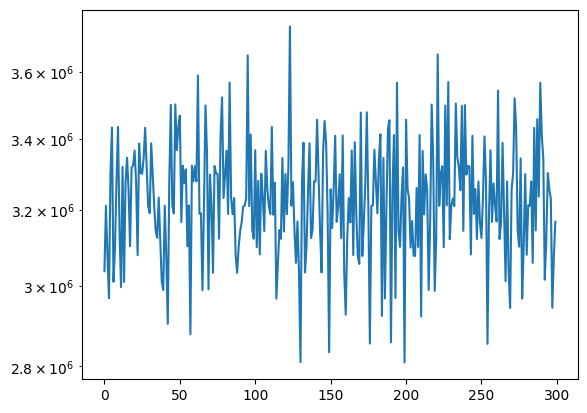

In [7]:
k=10
plt.semilogy(diffusion.losses[k * 300: (k+1) * 300])

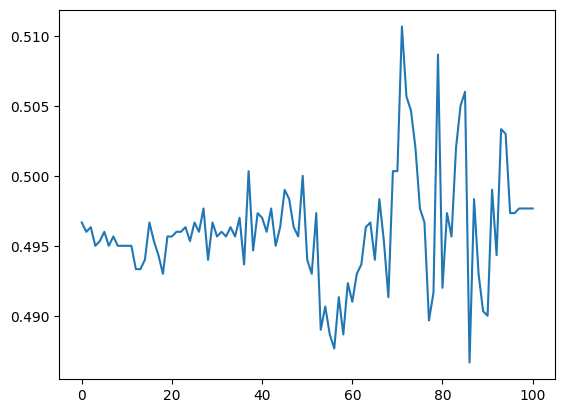

In [6]:
dd = diffusion.summary['p']
plt.plot(dd)
plt.show()

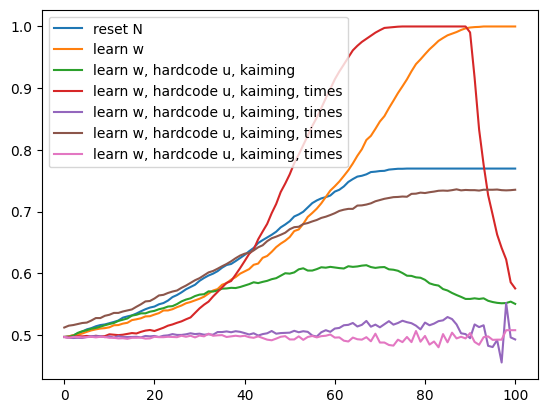

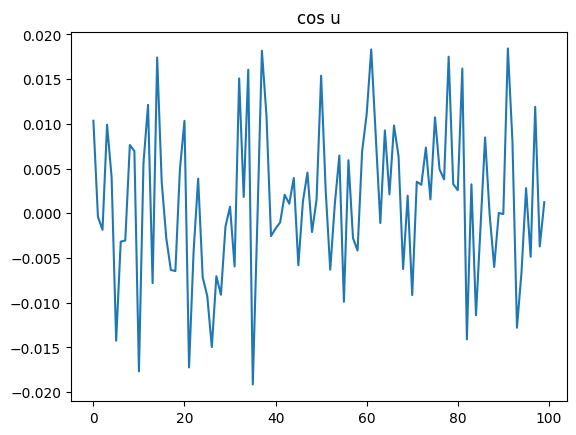

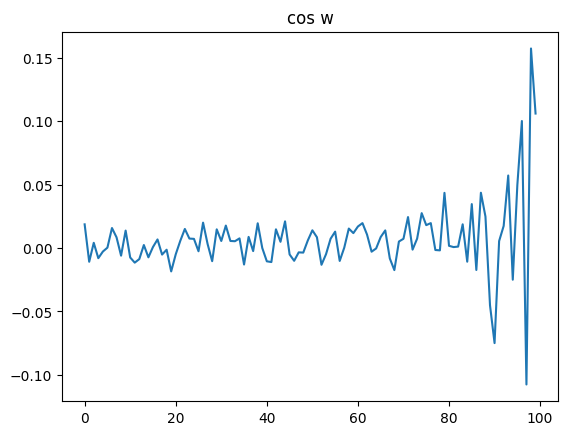

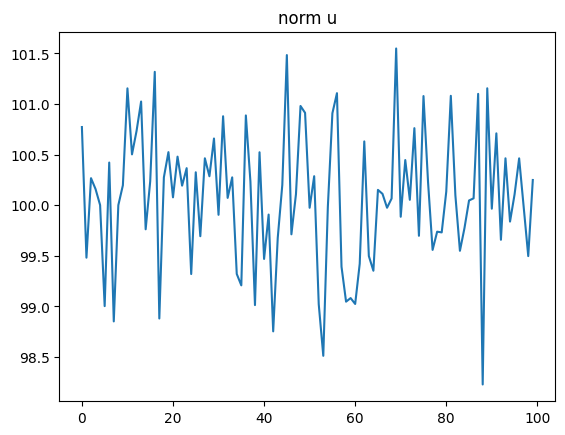

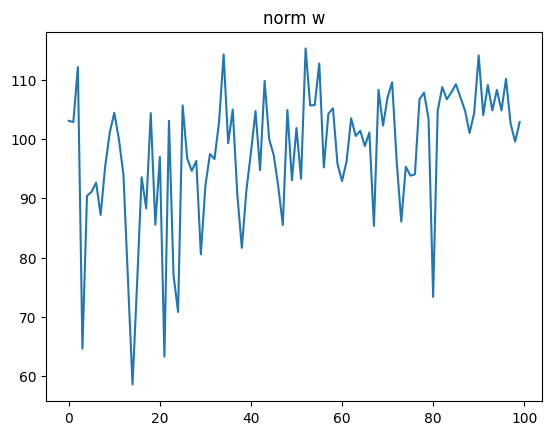

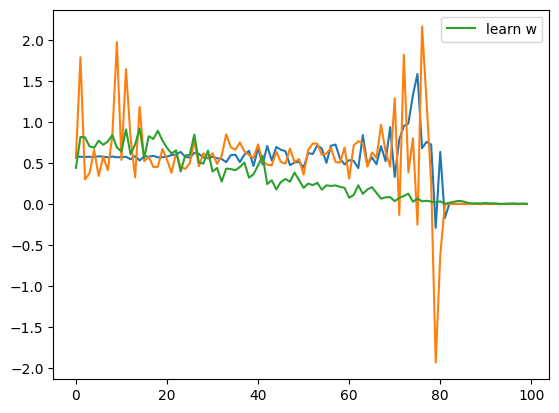

In [185]:
plt.plot(dd7, label='reset N')
plt.plot(dd8, label='learn w')
plt.plot(dd10, label='learn w, hardcode u, kaiming')
plt.plot(dd11, label='learn w, hardcode u, kaiming, times')
plt.plot(dd12, label='learn w, hardcode u, kaiming, times')
plt.plot(dd13, label='learn w, hardcode u, kaiming, times')
plt.plot(dd14, label='learn w, hardcode u, kaiming, times')
plt.legend()
plt.show()
plt.title('cos u')
plt.plot(diffusion.summary['Cos u'])
plt.show()
plt.title('cos w')
plt.plot(diffusion.summary['Cos w'])
plt.show()
plt.title('norm u')
plt.plot(diffusion.summary['Norm u'])
plt.show()
plt.title('norm w')
plt.plot(diffusion.summary['Norm w'])
plt.show()
plt.plot(bb2)
plt.plot(bb3)
plt.plot(np.abs(bb10), label='learn w')
plt.legend()

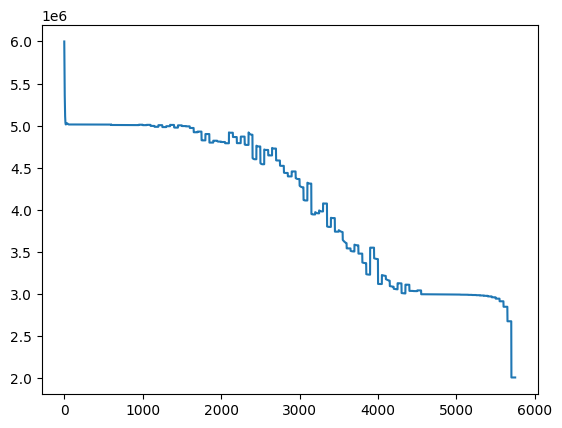

In [10]:
plt.plot(diffusion.losses)

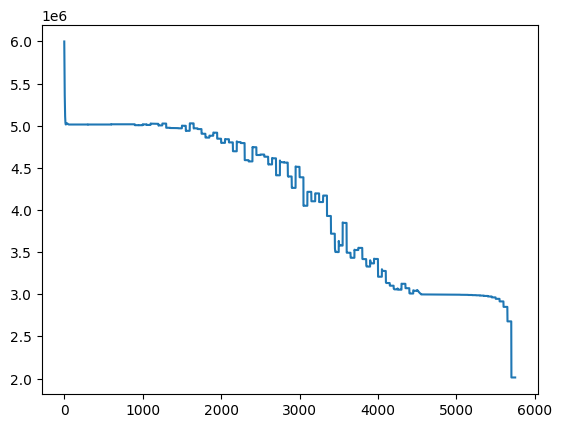

In [51]:
plt.plot(diffusion.losses)

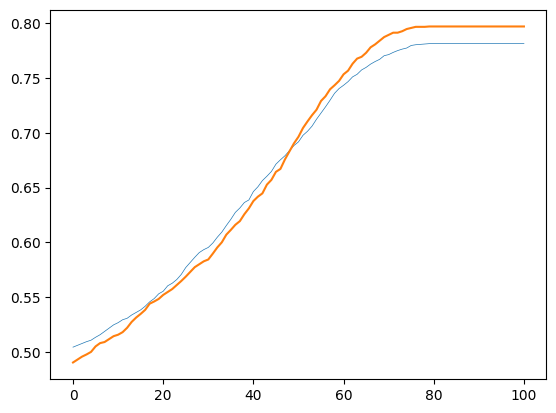

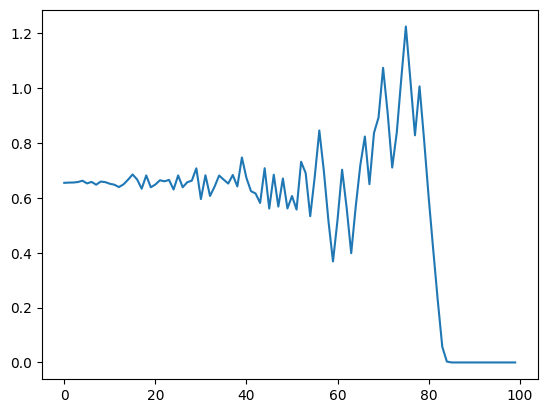

In [14]:
a = [0.49033333, 0.493     , 0.49566667, 0.49766667, 0.5       , 0.505     , 0.508     , 0.509     , 0.51166667, 0.51433333, 0.51566667, 0.518     , 0.522     , 0.52733333, 0.53133333, 0.53466667, 0.53833333, 0.544     , 0.546     , 0.54833333, 0.552     , 0.55466667, 0.55733333, 0.561     , 0.56466667, 0.56866667, 0.573     , 0.57733333, 0.58      , 0.58266667, 0.58433333, 0.58966667, 0.59533333, 0.6       , 0.607     , 0.61133333, 0.616     , 0.61933333, 0.62566667, 0.631     , 0.63766667, 0.64166667, 0.64466667, 0.65266667, 0.657     , 0.66433333, 0.667     , 0.67566667, 0.683     , 0.69033333, 0.69633333, 0.70433333, 0.71033333, 0.716     , 0.721     , 0.729     , 0.73333333, 0.73966667, 0.74333333, 0.74733333, 0.75333333, 0.75666667, 0.763     , 0.76766667, 0.76933333, 0.773     , 0.778     , 0.78066667, 0.784     , 0.78733333, 0.78933333, 0.79133333, 0.79133333, 0.79266667, 0.79466667, 0.79566667, 0.79666667, 0.79666667, 0.79666667, 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     ]
plt.plot(diffusion.summary['p'], lw=.5)
plt.plot(a, label='exact')
plt.show()
plt.plot(diffusion.summary['b'])


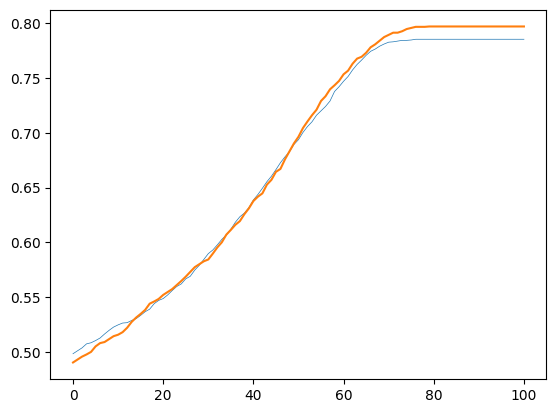

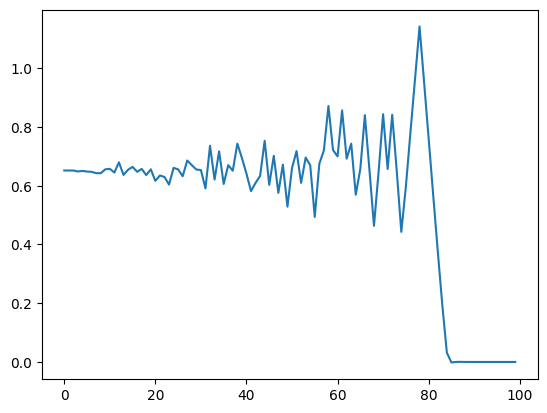

In [9]:
a = [0.49033333, 0.493     , 0.49566667, 0.49766667, 0.5       , 0.505     , 0.508     , 0.509     , 0.51166667, 0.51433333, 0.51566667, 0.518     , 0.522     , 0.52733333, 0.53133333, 0.53466667, 0.53833333, 0.544     , 0.546     , 0.54833333, 0.552     , 0.55466667, 0.55733333, 0.561     , 0.56466667, 0.56866667, 0.573     , 0.57733333, 0.58      , 0.58266667, 0.58433333, 0.58966667, 0.59533333, 0.6       , 0.607     , 0.61133333, 0.616     , 0.61933333, 0.62566667, 0.631     , 0.63766667, 0.64166667, 0.64466667, 0.65266667, 0.657     , 0.66433333, 0.667     , 0.67566667, 0.683     , 0.69033333, 0.69633333, 0.70433333, 0.71033333, 0.716     , 0.721     , 0.729     , 0.73333333, 0.73966667, 0.74333333, 0.74733333, 0.75333333, 0.75666667, 0.763     , 0.76766667, 0.76933333, 0.773     , 0.778     , 0.78066667, 0.784     , 0.78733333, 0.78933333, 0.79133333, 0.79133333, 0.79266667, 0.79466667, 0.79566667, 0.79666667, 0.79666667, 0.79666667, 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     ]
plt.plot(diffusion.summary['p'], lw=.5)
plt.plot(a, label='exact')
plt.show()
plt.plot(diffusion.summary['b'])


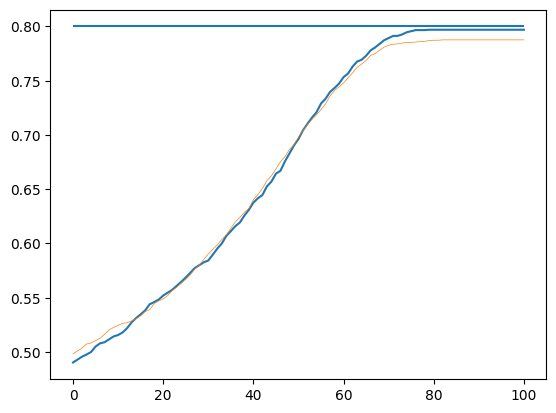

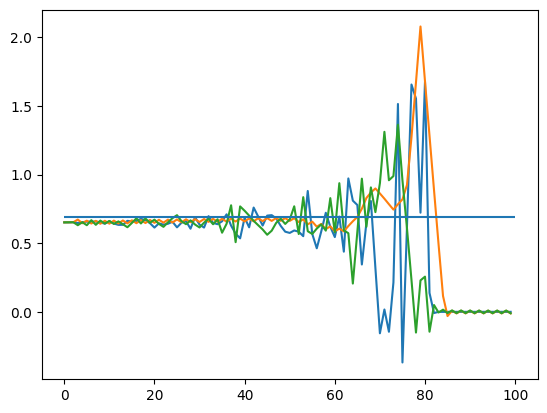

In [52]:
a = [0.49033333, 0.493     , 0.49566667, 0.49766667, 0.5       , 0.505     , 0.508     , 0.509     , 0.51166667, 0.51433333, 0.51566667, 0.518     , 0.522     , 0.52733333, 0.53133333, 0.53466667, 0.53833333, 0.544     , 0.546     , 0.54833333, 0.552     , 0.55466667, 0.55733333, 0.561     , 0.56466667, 0.56866667, 0.573     , 0.57733333, 0.58      , 0.58266667, 0.58433333, 0.58966667, 0.59533333, 0.6       , 0.607     , 0.61133333, 0.616     , 0.61933333, 0.62566667, 0.631     , 0.63766667, 0.64166667, 0.64466667, 0.65266667, 0.657     , 0.66433333, 0.667     , 0.67566667, 0.683     , 0.69033333, 0.69633333, 0.70433333, 0.71033333, 0.716     , 0.721     , 0.729     , 0.73333333, 0.73966667, 0.74333333, 0.74733333, 0.75333333, 0.75666667, 0.763     , 0.76766667, 0.76933333, 0.773     , 0.778     , 0.78066667, 0.784     , 0.78733333, 0.78933333, 0.79133333, 0.79133333, 0.79266667, 0.79466667, 0.79566667, 0.79666667, 0.79666667, 0.79666667, 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     ]
b = [0.49033333333333334,0.49266666666666664,0.49566666666666664,0.49733333333333335,0.49933333333333335,0.504,0.507,0.5083333333333333,0.5103333333333333,0.513,0.5143333333333333,0.516,0.5186666666666667,0.5216666666666666,0.527,0.53,0.5326666666666666,0.5363333333333333,0.5403333333333333,0.5443333333333333,0.546,0.5483333333333333,0.5513333333333333,0.5533333333333333,0.5566666666666666,0.5583333333333333,0.5616666666666666,0.5646666666666667,0.5686666666666667,0.5716666666666667,0.5763333333333334,0.5776666666666667,0.581,0.5826666666666667,0.5846666666666667,0.5893333333333334,0.593,0.5983333333333334,0.603,0.608,0.6116666666666667,0.616,0.6186666666666667,0.6233333333333333,0.629,0.635,0.639,0.643,0.647,0.6533333333333333,0.6583333333333333,0.6653333333333333,0.6686666666666666,0.6773333333333333,0.685,0.694,0.7013333333333334,0.7096666666666667,0.715,0.7226666666666667,0.73,0.7366666666666667,0.743,0.7476666666666667,0.7546666666666667,0.7616666666666667,0.7683333333333333,0.772,0.7793333333333333,0.784,0.7896666666666666,0.7913333333333333,0.794,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666]
plt.plot(a, label='exact')
#plt.plot(diffusion.summary['p'], lw=.5)
plt.plot(dd, lw=.5)
#plt.plot(dd2, lw=.5, c='red')
plt.hlines(.8, 0, 100)
plt.show()
plt.plot(diffusion.summary['b'])
plt.plot(bb)
plt.plot(bb2)
plt.hlines(.693, 0, 100)

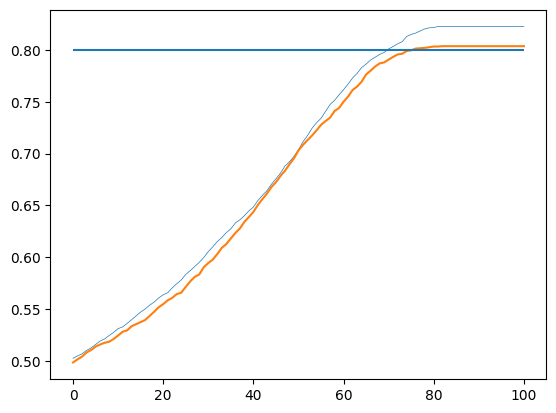

In [12]:
plt.plot(diffusion.summary['p'], lw=.5)
plt.plot(dd)
plt.hlines(.8, 0, 100)

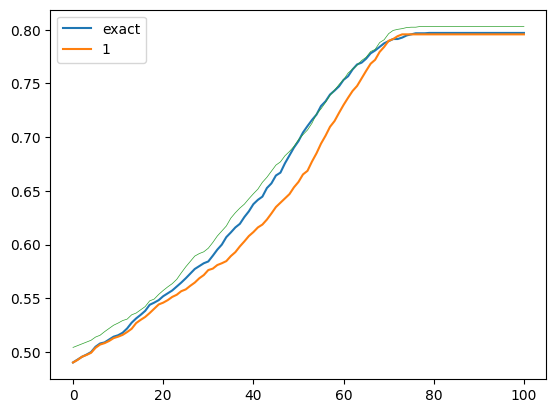

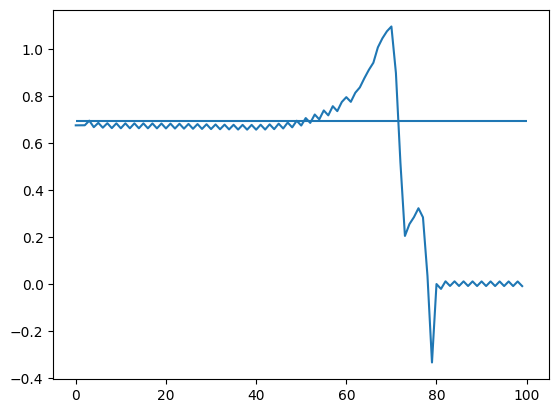

In [19]:
a = [0.49033333, 0.493     , 0.49566667, 0.49766667, 0.5       , 0.505     , 0.508     , 0.509     , 0.51166667, 0.51433333, 0.51566667, 0.518     , 0.522     , 0.52733333, 0.53133333, 0.53466667, 0.53833333, 0.544     , 0.546     , 0.54833333, 0.552     , 0.55466667, 0.55733333, 0.561     , 0.56466667, 0.56866667, 0.573     , 0.57733333, 0.58      , 0.58266667, 0.58433333, 0.58966667, 0.59533333, 0.6       , 0.607     , 0.61133333, 0.616     , 0.61933333, 0.62566667, 0.631     , 0.63766667, 0.64166667, 0.64466667, 0.65266667, 0.657     , 0.66433333, 0.667     , 0.67566667, 0.683     , 0.69033333, 0.69633333, 0.70433333, 0.71033333, 0.716     , 0.721     , 0.729     , 0.73333333, 0.73966667, 0.74333333, 0.74733333, 0.75333333, 0.75666667, 0.763     , 0.76766667, 0.76933333, 0.773     , 0.778     , 0.78066667, 0.784     , 0.78733333, 0.78933333, 0.79133333, 0.79133333, 0.79266667, 0.79466667, 0.79566667, 0.79666667, 0.79666667, 0.79666667, 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     ]
b = [0.49033333333333334,0.49266666666666664,0.49566666666666664,0.49733333333333335,0.49933333333333335,0.504,0.507,0.5083333333333333,0.5103333333333333,0.513,0.5143333333333333,0.516,0.5186666666666667,0.5216666666666666,0.527,0.53,0.5326666666666666,0.5363333333333333,0.5403333333333333,0.5443333333333333,0.546,0.5483333333333333,0.5513333333333333,0.5533333333333333,0.5566666666666666,0.5583333333333333,0.5616666666666666,0.5646666666666667,0.5686666666666667,0.5716666666666667,0.5763333333333334,0.5776666666666667,0.581,0.5826666666666667,0.5846666666666667,0.5893333333333334,0.593,0.5983333333333334,0.603,0.608,0.6116666666666667,0.616,0.6186666666666667,0.6233333333333333,0.629,0.635,0.639,0.643,0.647,0.6533333333333333,0.6583333333333333,0.6653333333333333,0.6686666666666666,0.6773333333333333,0.685,0.694,0.7013333333333334,0.7096666666666667,0.715,0.7226666666666667,0.73,0.7366666666666667,0.743,0.7476666666666667,0.7546666666666667,0.7616666666666667,0.7683333333333333,0.772,0.7793333333333333,0.784,0.7896666666666666,0.7913333333333333,0.794,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666]
plt.plot(a, label='exact')
plt.plot(b, label='1')
plt.plot(diffusion.summary['p'], lw=.5)
plt.legend()
plt.show()
plt.plot(diffusion.summary['b'])
plt.hlines(.693, 0, 100)

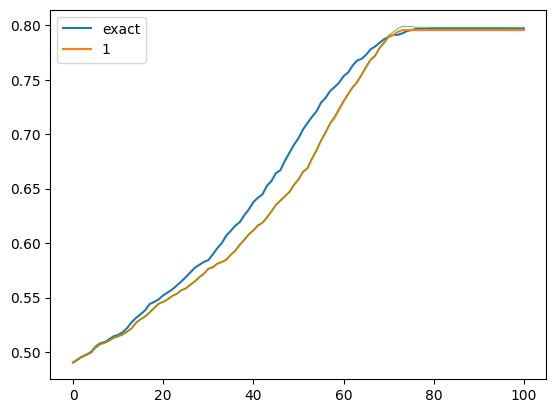

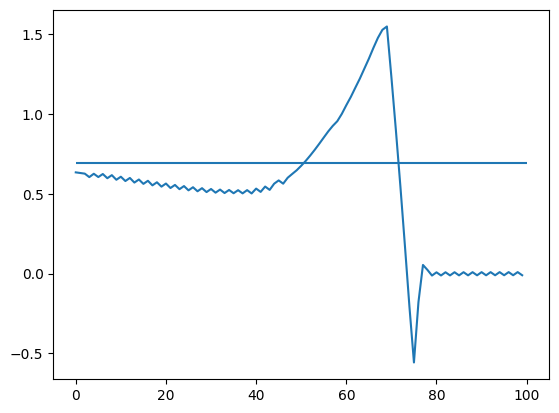

In [68]:
a = [0.49033333, 0.493     , 0.49566667, 0.49766667, 0.5       , 0.505     , 0.508     , 0.509     , 0.51166667, 0.51433333, 0.51566667, 0.518     , 0.522     , 0.52733333, 0.53133333, 0.53466667, 0.53833333, 0.544     , 0.546     , 0.54833333, 0.552     , 0.55466667, 0.55733333, 0.561     , 0.56466667, 0.56866667, 0.573     , 0.57733333, 0.58      , 0.58266667, 0.58433333, 0.58966667, 0.59533333, 0.6       , 0.607     , 0.61133333, 0.616     , 0.61933333, 0.62566667, 0.631     , 0.63766667, 0.64166667, 0.64466667, 0.65266667, 0.657     , 0.66433333, 0.667     , 0.67566667, 0.683     , 0.69033333, 0.69633333, 0.70433333, 0.71033333, 0.716     , 0.721     , 0.729     , 0.73333333, 0.73966667, 0.74333333, 0.74733333, 0.75333333, 0.75666667, 0.763     , 0.76766667, 0.76933333, 0.773     , 0.778     , 0.78066667, 0.784     , 0.78733333, 0.78933333, 0.79133333, 0.79133333, 0.79266667, 0.79466667, 0.79566667, 0.79666667, 0.79666667, 0.79666667, 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     ]
b = [0.49033333333333334,0.49266666666666664,0.49566666666666664,0.49733333333333335,0.49933333333333335,0.504,0.507,0.5083333333333333,0.5103333333333333,0.513,0.5143333333333333,0.516,0.5186666666666667,0.5216666666666666,0.527,0.53,0.5326666666666666,0.5363333333333333,0.5403333333333333,0.5443333333333333,0.546,0.5483333333333333,0.5513333333333333,0.5533333333333333,0.5566666666666666,0.5583333333333333,0.5616666666666666,0.5646666666666667,0.5686666666666667,0.5716666666666667,0.5763333333333334,0.5776666666666667,0.581,0.5826666666666667,0.5846666666666667,0.5893333333333334,0.593,0.5983333333333334,0.603,0.608,0.6116666666666667,0.616,0.6186666666666667,0.6233333333333333,0.629,0.635,0.639,0.643,0.647,0.6533333333333333,0.6583333333333333,0.6653333333333333,0.6686666666666666,0.6773333333333333,0.685,0.694,0.7013333333333334,0.7096666666666667,0.715,0.7226666666666667,0.73,0.7366666666666667,0.743,0.7476666666666667,0.7546666666666667,0.7616666666666667,0.7683333333333333,0.772,0.7793333333333333,0.784,0.7896666666666666,0.7913333333333333,0.794,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666]
plt.plot(a, label='exact')
plt.plot(b, label='1')
plt.plot(diffusion.summary['p'], lw=.5)
plt.legend()
plt.show()
plt.plot(diffusion.summary['b'])
plt.hlines(.693, 0, 100)

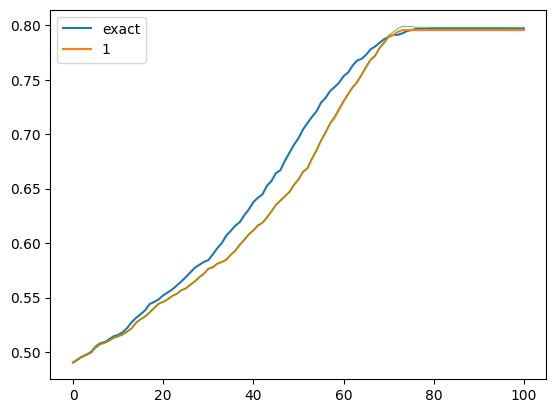

In [66]:
a = [0.49033333, 0.493     , 0.49566667, 0.49766667, 0.5       , 0.505     , 0.508     , 0.509     , 0.51166667, 0.51433333, 0.51566667, 0.518     , 0.522     , 0.52733333, 0.53133333, 0.53466667, 0.53833333, 0.544     , 0.546     , 0.54833333, 0.552     , 0.55466667, 0.55733333, 0.561     , 0.56466667, 0.56866667, 0.573     , 0.57733333, 0.58      , 0.58266667, 0.58433333, 0.58966667, 0.59533333, 0.6       , 0.607     , 0.61133333, 0.616     , 0.61933333, 0.62566667, 0.631     , 0.63766667, 0.64166667, 0.64466667, 0.65266667, 0.657     , 0.66433333, 0.667     , 0.67566667, 0.683     , 0.69033333, 0.69633333, 0.70433333, 0.71033333, 0.716     , 0.721     , 0.729     , 0.73333333, 0.73966667, 0.74333333, 0.74733333, 0.75333333, 0.75666667, 0.763     , 0.76766667, 0.76933333, 0.773     , 0.778     , 0.78066667, 0.784     , 0.78733333, 0.78933333, 0.79133333, 0.79133333, 0.79266667, 0.79466667, 0.79566667, 0.79666667, 0.79666667, 0.79666667, 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     ]
b = [0.49033333333333334,0.49266666666666664,0.49566666666666664,0.49733333333333335,0.49933333333333335,0.504,0.507,0.5083333333333333,0.5103333333333333,0.513,0.5143333333333333,0.516,0.5186666666666667,0.5216666666666666,0.527,0.53,0.5326666666666666,0.5363333333333333,0.5403333333333333,0.5443333333333333,0.546,0.5483333333333333,0.5513333333333333,0.5533333333333333,0.5566666666666666,0.5583333333333333,0.5616666666666666,0.5646666666666667,0.5686666666666667,0.5716666666666667,0.5763333333333334,0.5776666666666667,0.581,0.5826666666666667,0.5846666666666667,0.5893333333333334,0.593,0.5983333333333334,0.603,0.608,0.6116666666666667,0.616,0.6186666666666667,0.6233333333333333,0.629,0.635,0.639,0.643,0.647,0.6533333333333333,0.6583333333333333,0.6653333333333333,0.6686666666666666,0.6773333333333333,0.685,0.694,0.7013333333333334,0.7096666666666667,0.715,0.7226666666666667,0.73,0.7366666666666667,0.743,0.7476666666666667,0.7546666666666667,0.7616666666666667,0.7683333333333333,0.772,0.7793333333333333,0.784,0.7896666666666666,0.7913333333333333,0.794,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666]
plt.plot(a, label='exact')
plt.plot(b, label='1')
plt.plot(diffusion.summary['p'], lw=.5)
plt.legend()

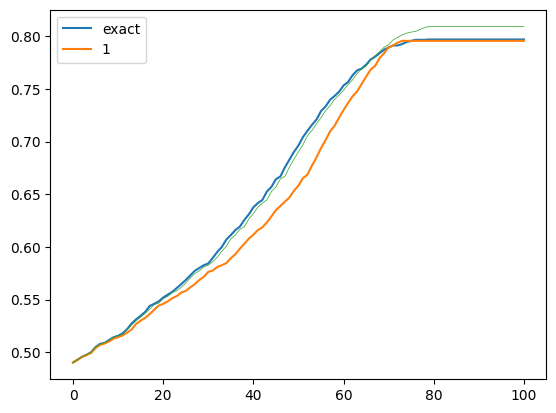

In [17]:
a = [0.49033333, 0.493     , 0.49566667, 0.49766667, 0.5       , 0.505     , 0.508     , 0.509     , 0.51166667, 0.51433333, 0.51566667, 0.518     , 0.522     , 0.52733333, 0.53133333, 0.53466667, 0.53833333, 0.544     , 0.546     , 0.54833333, 0.552     , 0.55466667, 0.55733333, 0.561     , 0.56466667, 0.56866667, 0.573     , 0.57733333, 0.58      , 0.58266667, 0.58433333, 0.58966667, 0.59533333, 0.6       , 0.607     , 0.61133333, 0.616     , 0.61933333, 0.62566667, 0.631     , 0.63766667, 0.64166667, 0.64466667, 0.65266667, 0.657     , 0.66433333, 0.667     , 0.67566667, 0.683     , 0.69033333, 0.69633333, 0.70433333, 0.71033333, 0.716     , 0.721     , 0.729     , 0.73333333, 0.73966667, 0.74333333, 0.74733333, 0.75333333, 0.75666667, 0.763     , 0.76766667, 0.76933333, 0.773     , 0.778     , 0.78066667, 0.784     , 0.78733333, 0.78933333, 0.79133333, 0.79133333, 0.79266667, 0.79466667, 0.79566667, 0.79666667, 0.79666667, 0.79666667, 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     ]
b = [0.49033333333333334,0.49266666666666664,0.49566666666666664,0.49733333333333335,0.49933333333333335,0.504,0.507,0.5083333333333333,0.5103333333333333,0.513,0.5143333333333333,0.516,0.5186666666666667,0.5216666666666666,0.527,0.53,0.5326666666666666,0.5363333333333333,0.5403333333333333,0.5443333333333333,0.546,0.5483333333333333,0.5513333333333333,0.5533333333333333,0.5566666666666666,0.5583333333333333,0.5616666666666666,0.5646666666666667,0.5686666666666667,0.5716666666666667,0.5763333333333334,0.5776666666666667,0.581,0.5826666666666667,0.5846666666666667,0.5893333333333334,0.593,0.5983333333333334,0.603,0.608,0.6116666666666667,0.616,0.6186666666666667,0.6233333333333333,0.629,0.635,0.639,0.643,0.647,0.6533333333333333,0.6583333333333333,0.6653333333333333,0.6686666666666666,0.6773333333333333,0.685,0.694,0.7013333333333334,0.7096666666666667,0.715,0.7226666666666667,0.73,0.7366666666666667,0.743,0.7476666666666667,0.7546666666666667,0.7616666666666667,0.7683333333333333,0.772,0.7793333333333333,0.784,0.7896666666666666,0.7913333333333333,0.794,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666]
plt.plot(a, label='exact')
plt.plot(b, label='1')
plt.plot(diffusion.summary['p'], lw=.5)
plt.legend()

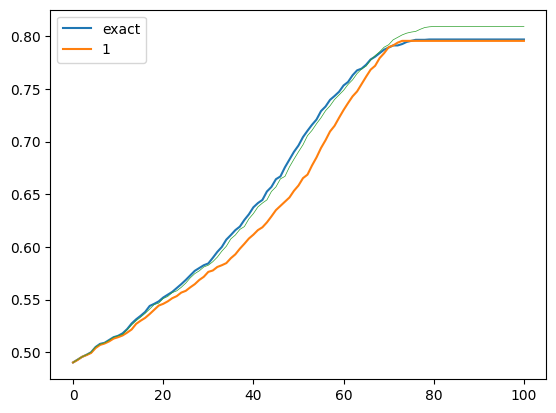

In [23]:
a = [0.49033333, 0.493     , 0.49566667, 0.49766667, 0.5       , 0.505     , 0.508     , 0.509     , 0.51166667, 0.51433333, 0.51566667, 0.518     , 0.522     , 0.52733333, 0.53133333, 0.53466667, 0.53833333, 0.544     , 0.546     , 0.54833333, 0.552     , 0.55466667, 0.55733333, 0.561     , 0.56466667, 0.56866667, 0.573     , 0.57733333, 0.58      , 0.58266667, 0.58433333, 0.58966667, 0.59533333, 0.6       , 0.607     , 0.61133333, 0.616     , 0.61933333, 0.62566667, 0.631     , 0.63766667, 0.64166667, 0.64466667, 0.65266667, 0.657     , 0.66433333, 0.667     , 0.67566667, 0.683     , 0.69033333, 0.69633333, 0.70433333, 0.71033333, 0.716     , 0.721     , 0.729     , 0.73333333, 0.73966667, 0.74333333, 0.74733333, 0.75333333, 0.75666667, 0.763     , 0.76766667, 0.76933333, 0.773     , 0.778     , 0.78066667, 0.784     , 0.78733333, 0.78933333, 0.79133333, 0.79133333, 0.79266667, 0.79466667, 0.79566667, 0.79666667, 0.79666667, 0.79666667, 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     ]
b = [0.49033333333333334,0.49266666666666664,0.49566666666666664,0.49733333333333335,0.49933333333333335,0.504,0.507,0.5083333333333333,0.5103333333333333,0.513,0.5143333333333333,0.516,0.5186666666666667,0.5216666666666666,0.527,0.53,0.5326666666666666,0.5363333333333333,0.5403333333333333,0.5443333333333333,0.546,0.5483333333333333,0.5513333333333333,0.5533333333333333,0.5566666666666666,0.5583333333333333,0.5616666666666666,0.5646666666666667,0.5686666666666667,0.5716666666666667,0.5763333333333334,0.5776666666666667,0.581,0.5826666666666667,0.5846666666666667,0.5893333333333334,0.593,0.5983333333333334,0.603,0.608,0.6116666666666667,0.616,0.6186666666666667,0.6233333333333333,0.629,0.635,0.639,0.643,0.647,0.6533333333333333,0.6583333333333333,0.6653333333333333,0.6686666666666666,0.6773333333333333,0.685,0.694,0.7013333333333334,0.7096666666666667,0.715,0.7226666666666667,0.73,0.7366666666666667,0.743,0.7476666666666667,0.7546666666666667,0.7616666666666667,0.7683333333333333,0.772,0.7793333333333333,0.784,0.7896666666666666,0.7913333333333333,0.794,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666]
plt.plot(a, label='exact')
plt.plot(b, label='1')
plt.plot(diffusion.summary['p'], lw=.5)
plt.legend()

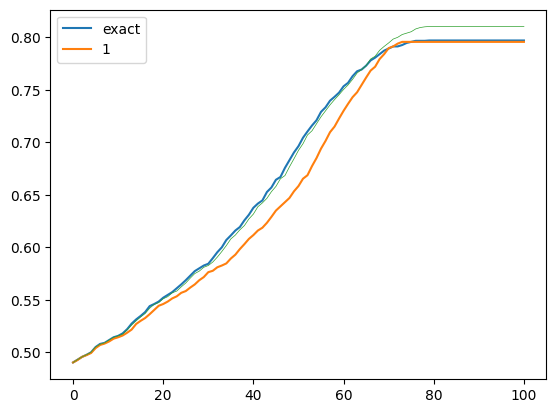

In [50]:
a = [0.49033333, 0.493     , 0.49566667, 0.49766667, 0.5       , 0.505     , 0.508     , 0.509     , 0.51166667, 0.51433333, 0.51566667, 0.518     , 0.522     , 0.52733333, 0.53133333, 0.53466667, 0.53833333, 0.544     , 0.546     , 0.54833333, 0.552     , 0.55466667, 0.55733333, 0.561     , 0.56466667, 0.56866667, 0.573     , 0.57733333, 0.58      , 0.58266667, 0.58433333, 0.58966667, 0.59533333, 0.6       , 0.607     , 0.61133333, 0.616     , 0.61933333, 0.62566667, 0.631     , 0.63766667, 0.64166667, 0.64466667, 0.65266667, 0.657     , 0.66433333, 0.667     , 0.67566667, 0.683     , 0.69033333, 0.69633333, 0.70433333, 0.71033333, 0.716     , 0.721     , 0.729     , 0.73333333, 0.73966667, 0.74333333, 0.74733333, 0.75333333, 0.75666667, 0.763     , 0.76766667, 0.76933333, 0.773     , 0.778     , 0.78066667, 0.784     , 0.78733333, 0.78933333, 0.79133333, 0.79133333, 0.79266667, 0.79466667, 0.79566667, 0.79666667, 0.79666667, 0.79666667, 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     ]
b = [0.49033333333333334,0.49266666666666664,0.49566666666666664,0.49733333333333335,0.49933333333333335,0.504,0.507,0.5083333333333333,0.5103333333333333,0.513,0.5143333333333333,0.516,0.5186666666666667,0.5216666666666666,0.527,0.53,0.5326666666666666,0.5363333333333333,0.5403333333333333,0.5443333333333333,0.546,0.5483333333333333,0.5513333333333333,0.5533333333333333,0.5566666666666666,0.5583333333333333,0.5616666666666666,0.5646666666666667,0.5686666666666667,0.5716666666666667,0.5763333333333334,0.5776666666666667,0.581,0.5826666666666667,0.5846666666666667,0.5893333333333334,0.593,0.5983333333333334,0.603,0.608,0.6116666666666667,0.616,0.6186666666666667,0.6233333333333333,0.629,0.635,0.639,0.643,0.647,0.6533333333333333,0.6583333333333333,0.6653333333333333,0.6686666666666666,0.6773333333333333,0.685,0.694,0.7013333333333334,0.7096666666666667,0.715,0.7226666666666667,0.73,0.7366666666666667,0.743,0.7476666666666667,0.7546666666666667,0.7616666666666667,0.7683333333333333,0.772,0.7793333333333333,0.784,0.7896666666666666,0.7913333333333333,0.794,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666]
plt.plot(a, label='exact')
plt.plot(b, label='1')
plt.plot(diffusion.summary['p'], lw=.5)
plt.legend()

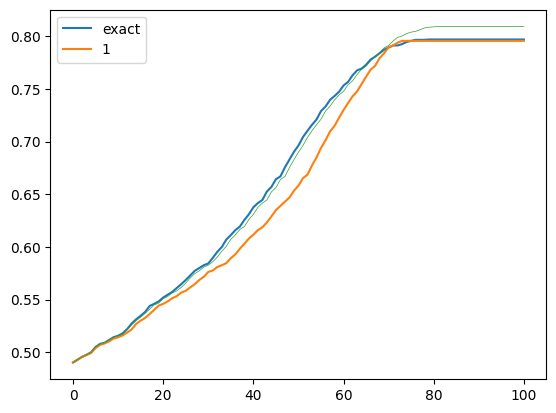

In [56]:
a = [0.49033333, 0.493     , 0.49566667, 0.49766667, 0.5       , 0.505     , 0.508     , 0.509     , 0.51166667, 0.51433333, 0.51566667, 0.518     , 0.522     , 0.52733333, 0.53133333, 0.53466667, 0.53833333, 0.544     , 0.546     , 0.54833333, 0.552     , 0.55466667, 0.55733333, 0.561     , 0.56466667, 0.56866667, 0.573     , 0.57733333, 0.58      , 0.58266667, 0.58433333, 0.58966667, 0.59533333, 0.6       , 0.607     , 0.61133333, 0.616     , 0.61933333, 0.62566667, 0.631     , 0.63766667, 0.64166667, 0.64466667, 0.65266667, 0.657     , 0.66433333, 0.667     , 0.67566667, 0.683     , 0.69033333, 0.69633333, 0.70433333, 0.71033333, 0.716     , 0.721     , 0.729     , 0.73333333, 0.73966667, 0.74333333, 0.74733333, 0.75333333, 0.75666667, 0.763     , 0.76766667, 0.76933333, 0.773     , 0.778     , 0.78066667, 0.784     , 0.78733333, 0.78933333, 0.79133333, 0.79133333, 0.79266667, 0.79466667, 0.79566667, 0.79666667, 0.79666667, 0.79666667, 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     ]
b = [0.49033333333333334,0.49266666666666664,0.49566666666666664,0.49733333333333335,0.49933333333333335,0.504,0.507,0.5083333333333333,0.5103333333333333,0.513,0.5143333333333333,0.516,0.5186666666666667,0.5216666666666666,0.527,0.53,0.5326666666666666,0.5363333333333333,0.5403333333333333,0.5443333333333333,0.546,0.5483333333333333,0.5513333333333333,0.5533333333333333,0.5566666666666666,0.5583333333333333,0.5616666666666666,0.5646666666666667,0.5686666666666667,0.5716666666666667,0.5763333333333334,0.5776666666666667,0.581,0.5826666666666667,0.5846666666666667,0.5893333333333334,0.593,0.5983333333333334,0.603,0.608,0.6116666666666667,0.616,0.6186666666666667,0.6233333333333333,0.629,0.635,0.639,0.643,0.647,0.6533333333333333,0.6583333333333333,0.6653333333333333,0.6686666666666666,0.6773333333333333,0.685,0.694,0.7013333333333334,0.7096666666666667,0.715,0.7226666666666667,0.73,0.7366666666666667,0.743,0.7476666666666667,0.7546666666666667,0.7616666666666667,0.7683333333333333,0.772,0.7793333333333333,0.784,0.7896666666666666,0.7913333333333333,0.794,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666]
plt.plot(a, label='exact')
plt.plot(b, label='1')
plt.plot(diffusion.summary['p'], lw=.5)
plt.legend()

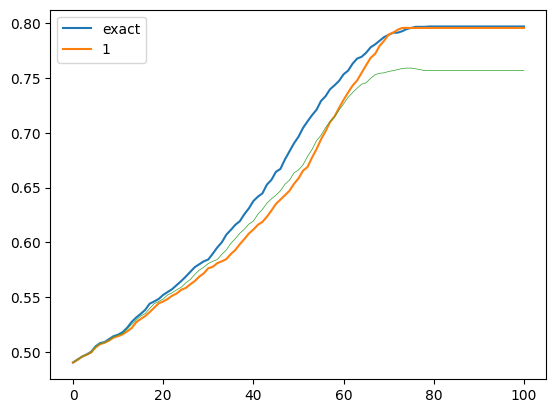

In [60]:
a = [0.49033333, 0.493     , 0.49566667, 0.49766667, 0.5       , 0.505     , 0.508     , 0.509     , 0.51166667, 0.51433333, 0.51566667, 0.518     , 0.522     , 0.52733333, 0.53133333, 0.53466667, 0.53833333, 0.544     , 0.546     , 0.54833333, 0.552     , 0.55466667, 0.55733333, 0.561     , 0.56466667, 0.56866667, 0.573     , 0.57733333, 0.58      , 0.58266667, 0.58433333, 0.58966667, 0.59533333, 0.6       , 0.607     , 0.61133333, 0.616     , 0.61933333, 0.62566667, 0.631     , 0.63766667, 0.64166667, 0.64466667, 0.65266667, 0.657     , 0.66433333, 0.667     , 0.67566667, 0.683     , 0.69033333, 0.69633333, 0.70433333, 0.71033333, 0.716     , 0.721     , 0.729     , 0.73333333, 0.73966667, 0.74333333, 0.74733333, 0.75333333, 0.75666667, 0.763     , 0.76766667, 0.76933333, 0.773     , 0.778     , 0.78066667, 0.784     , 0.78733333, 0.78933333, 0.79133333, 0.79133333, 0.79266667, 0.79466667, 0.79566667, 0.79666667, 0.79666667, 0.79666667, 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     , 0.797     ]
b = [0.49033333333333334,0.49266666666666664,0.49566666666666664,0.49733333333333335,0.49933333333333335,0.504,0.507,0.5083333333333333,0.5103333333333333,0.513,0.5143333333333333,0.516,0.5186666666666667,0.5216666666666666,0.527,0.53,0.5326666666666666,0.5363333333333333,0.5403333333333333,0.5443333333333333,0.546,0.5483333333333333,0.5513333333333333,0.5533333333333333,0.5566666666666666,0.5583333333333333,0.5616666666666666,0.5646666666666667,0.5686666666666667,0.5716666666666667,0.5763333333333334,0.5776666666666667,0.581,0.5826666666666667,0.5846666666666667,0.5893333333333334,0.593,0.5983333333333334,0.603,0.608,0.6116666666666667,0.616,0.6186666666666667,0.6233333333333333,0.629,0.635,0.639,0.643,0.647,0.6533333333333333,0.6583333333333333,0.6653333333333333,0.6686666666666666,0.6773333333333333,0.685,0.694,0.7013333333333334,0.7096666666666667,0.715,0.7226666666666667,0.73,0.7366666666666667,0.743,0.7476666666666667,0.7546666666666667,0.7616666666666667,0.7683333333333333,0.772,0.7793333333333333,0.784,0.7896666666666666,0.7913333333333333,0.794,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666,0.7956666666666666]
plt.plot(a, label='exact')
plt.plot(b, label='1')
plt.plot(diffusion.summary['p'], lw=.5)
plt.legend()

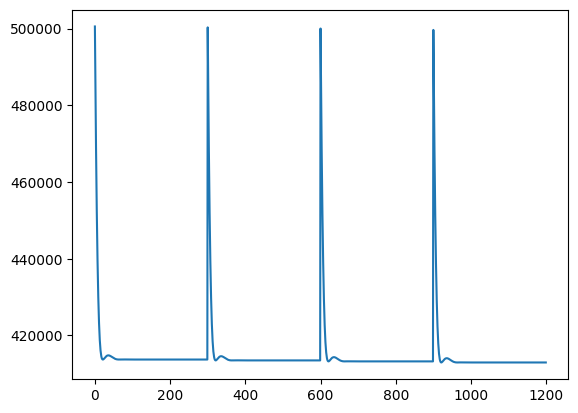

In [37]:
plt.plot(L[:1200])

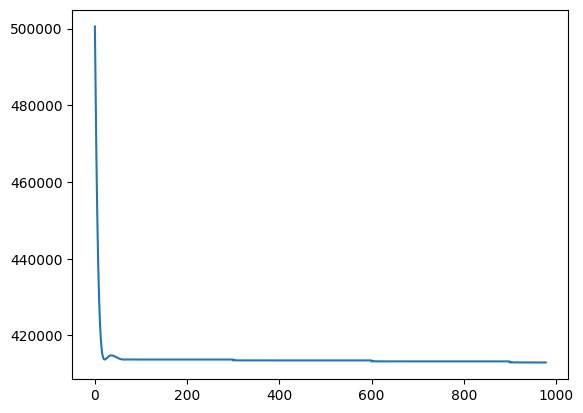

In [38]:
plt.plot(diffusion.losses[:1200])

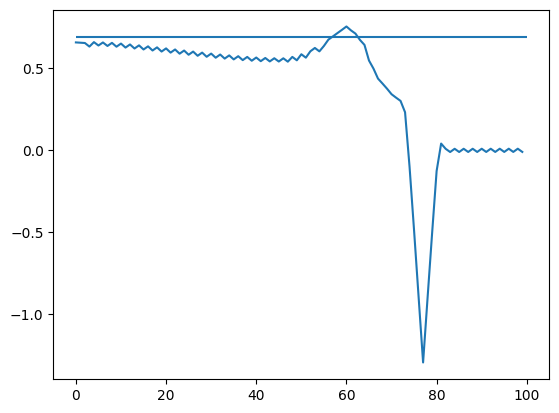

In [61]:
plt.plot(diffusion.summary['b'])
plt.hlines(.693, 0, 100)
#plt.ylim(0,1)

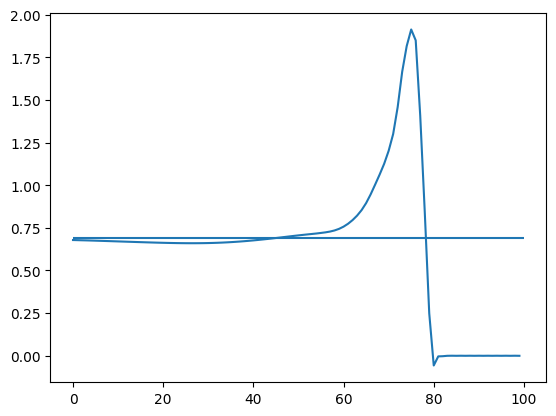

In [51]:
plt.plot(diffusion.summary['b'])
plt.hlines(.693, 0, 100)
#plt.ylim(0,1)

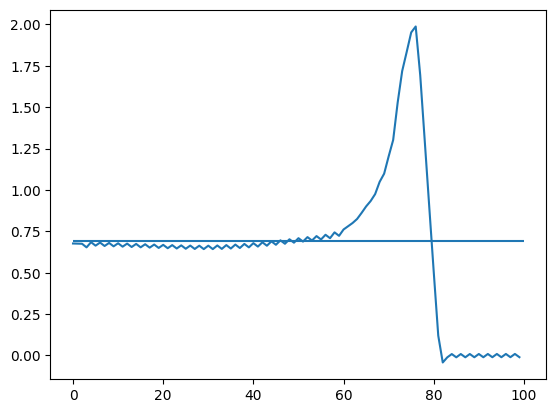

In [45]:
plt.plot(diffusion.summary['b'])
plt.hlines(.693, 0, 100)
#plt.ylim(0,1)

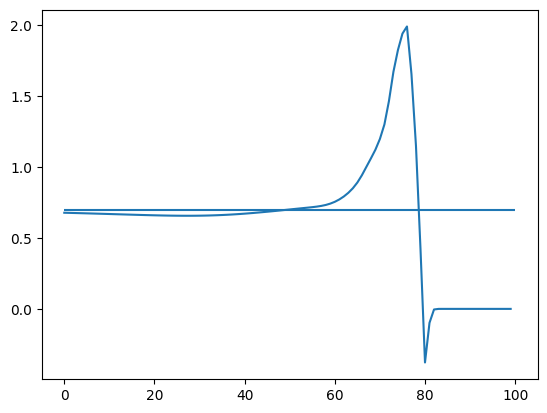

In [24]:
plt.plot(diffusion.summary['b'])
plt.hlines(.693, 0, 100)
#plt.ylim(0,1)

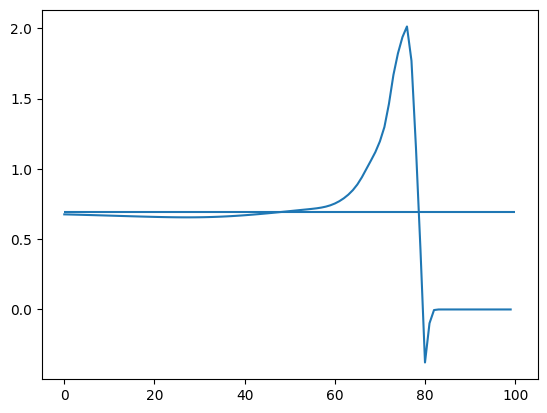

In [18]:
plt.plot(diffusion.summary['b'])
plt.hlines(.693, 0, 100)
#plt.ylim(0,1)

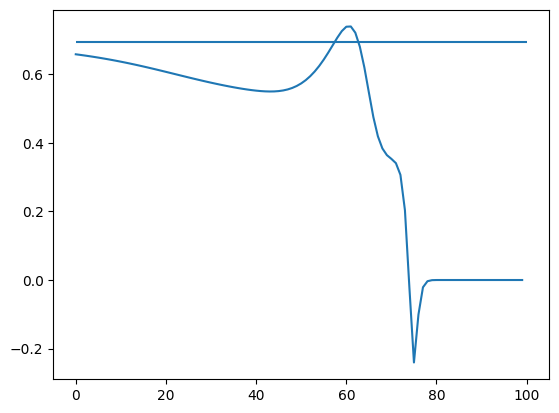

In [12]:
plt.plot(diffusion.summary['b'])
plt.hlines(.693, 0, 100)
#plt.ylim(0,1)

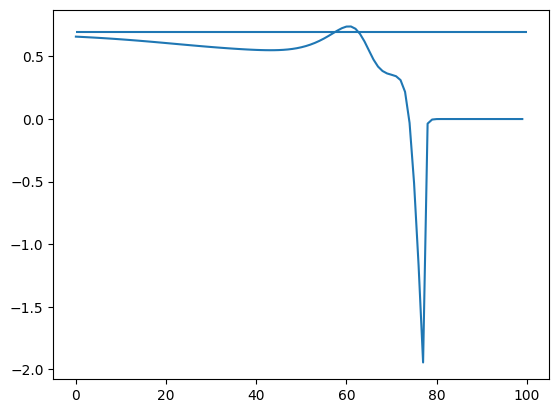

In [5]:
plt.plot(diffusion.summary['b'])
plt.hlines(.693, 0, 100)
#plt.ylim(0,1)

(0.0, 1.0)

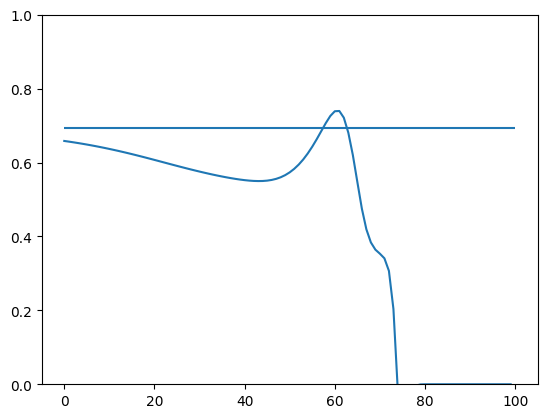

In [13]:
plt.plot(diffusion.summary['b'])
plt.hlines(.693, 0, 100)
plt.ylim(0,1)

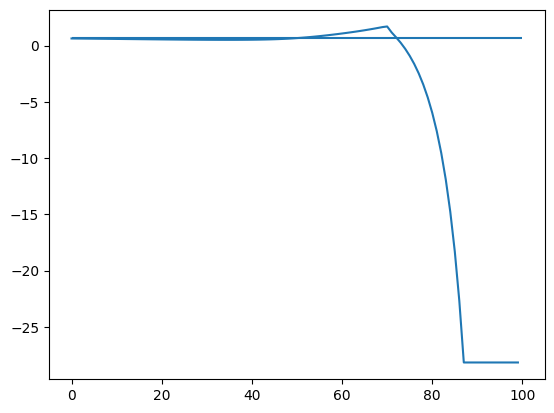

In [49]:
plt.plot(diffusion.summary['b'])
plt.hlines(.693, 0, 100)
#plt.ylim(0,1)

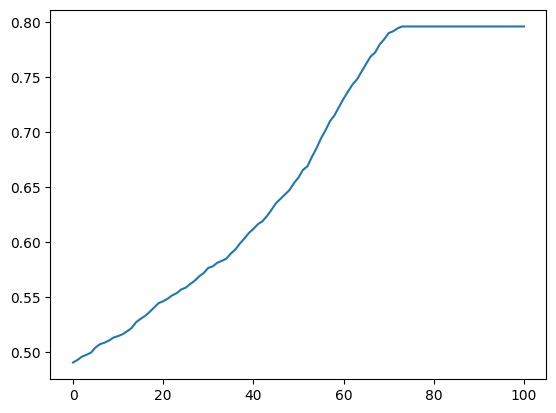

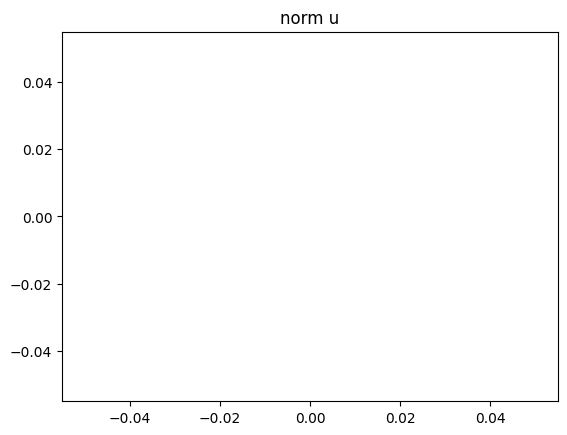

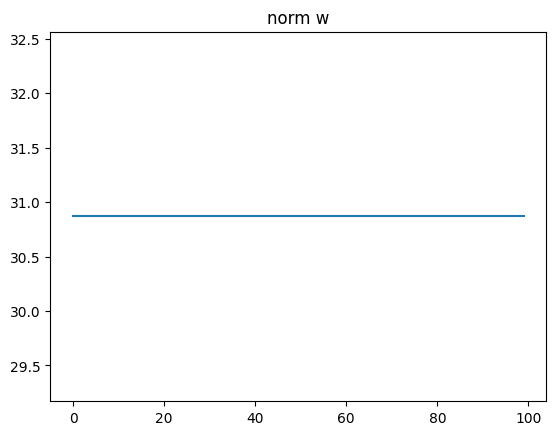

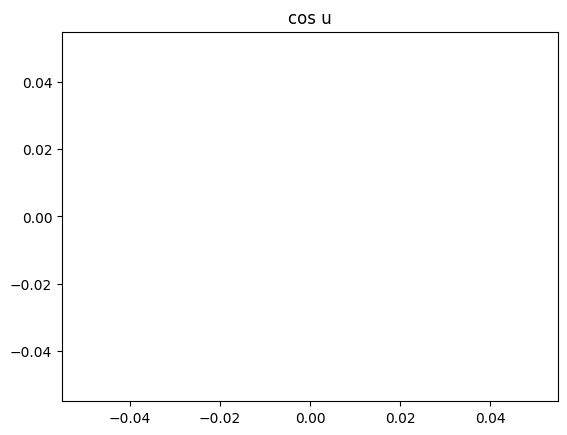

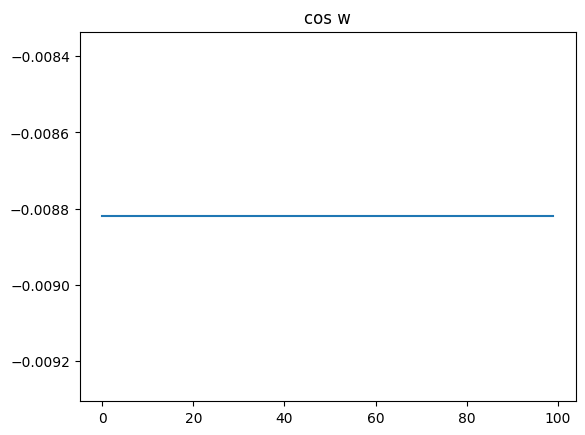

AxisError: axis 1 is out of bounds for array of dimension 1

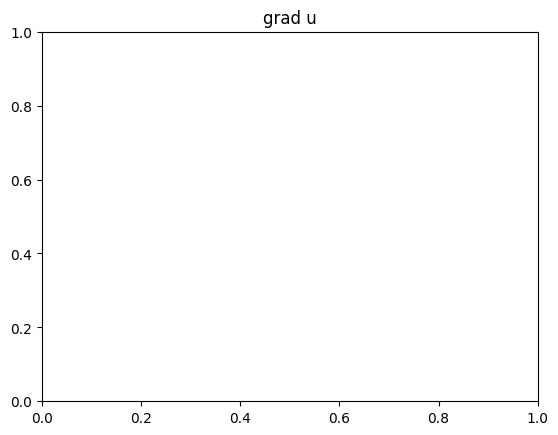

In [28]:
plt.plot(diffusion.summary['p'])
plt.show()
plt.title('norm u')
plt.plot(diffusion.summary['Norm u'])
plt.show()
plt.title('norm w')
plt.plot(diffusion.summary['Norm w'])
plt.show()
plt.title('cos u')
plt.plot(diffusion.summary['Cos u'])
plt.show()
plt.title('cos w')
plt.plot(diffusion.summary['Cos w'])
plt.show()
plt.title('grad u')
plt.plot(np.linalg.norm(np.array(diffusion.summary['Grad u']), axis=1))
plt.show()
plt.title('grad w')
plt.plot(np.linalg.norm(np.array(diffusion.summary['Grad w']), axis=1))
plt.show()

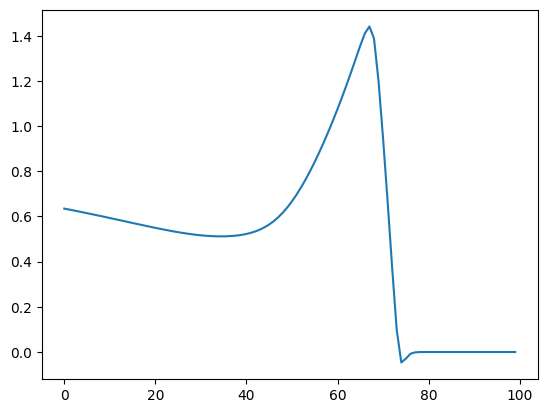

In [30]:
plt.plot(diffusion.summary['b'])

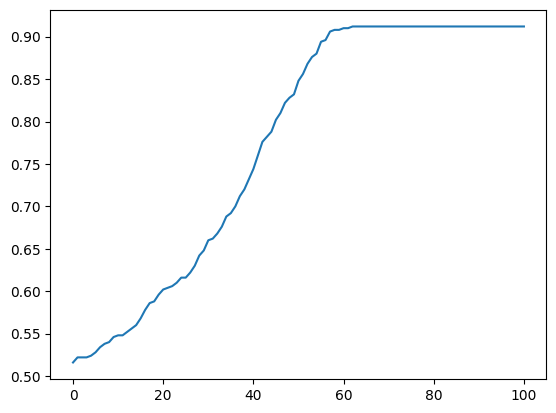

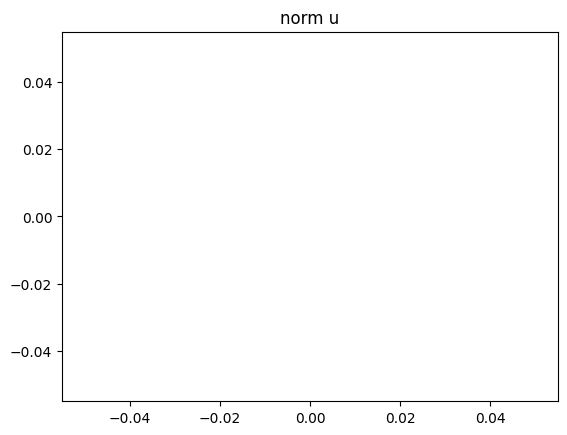

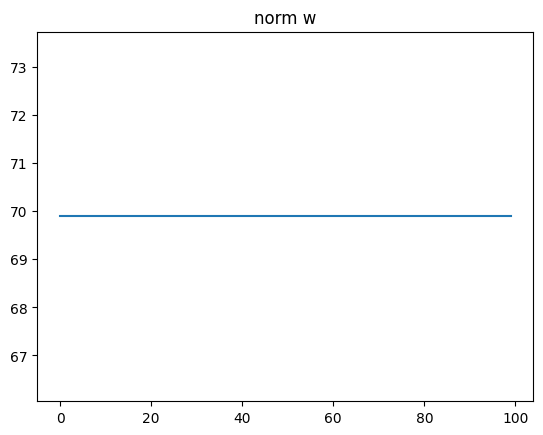

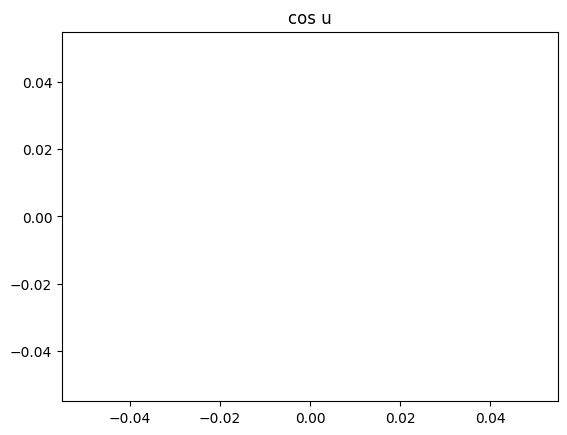

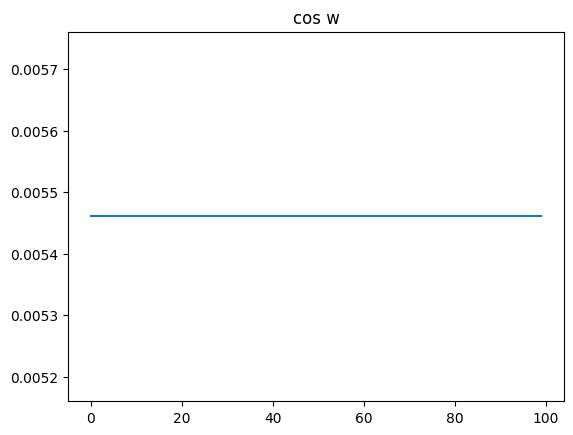

AxisError: axis 1 is out of bounds for array of dimension 1

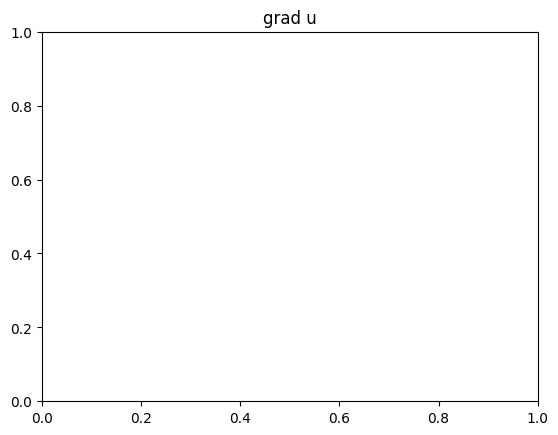

In [37]:
plt.plot(diffusion.summary['p'])
plt.show()
plt.title('norm u')
plt.plot(diffusion.summary['Norm u'])
plt.show()
plt.title('norm w')
plt.plot(diffusion.summary['Norm w'])
plt.show()
plt.title('cos u')
plt.plot(diffusion.summary['Cos u'])
plt.show()
plt.title('cos w')
plt.plot(diffusion.summary['Cos w'])
plt.show()
plt.title('grad u')
plt.plot(np.linalg.norm(np.array(diffusion.summary['Grad u']), axis=1))
plt.show()
plt.title('grad w')
plt.plot(np.linalg.norm(np.array(diffusion.summary['Grad w']), axis=1))
plt.show()

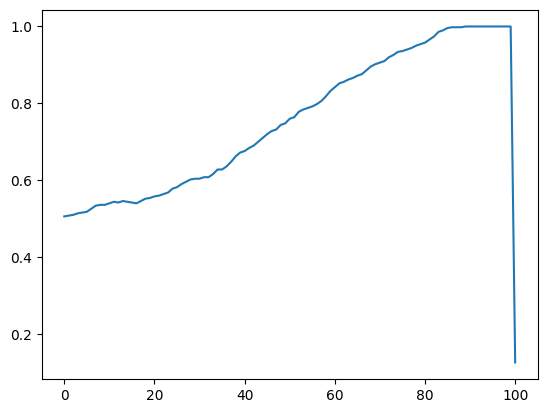

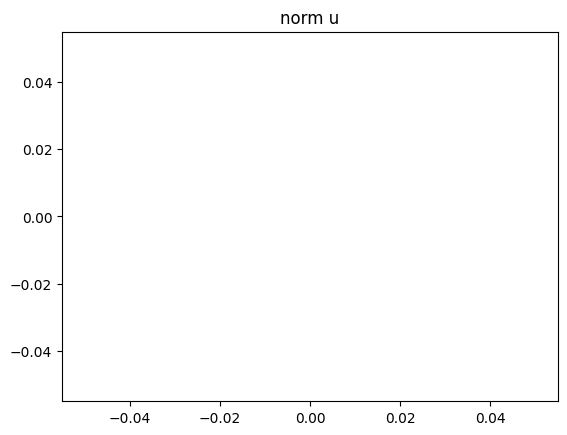

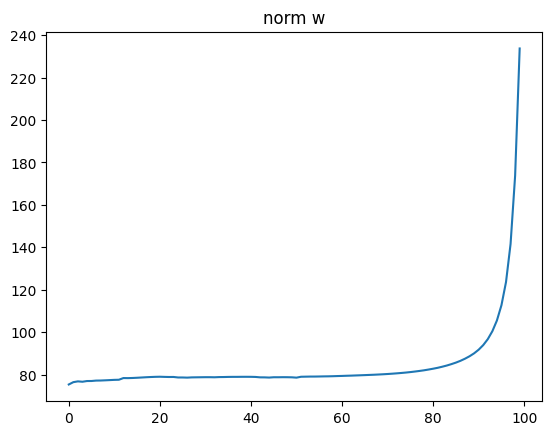

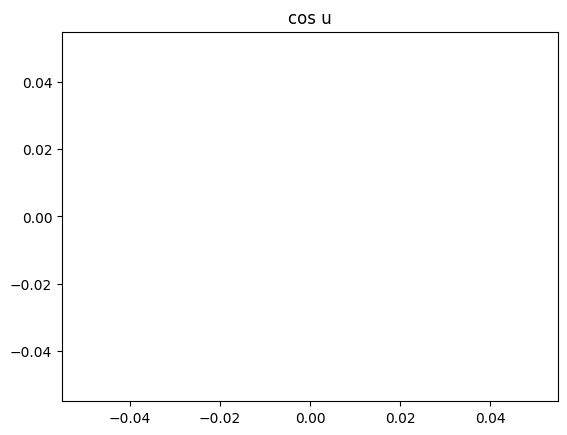

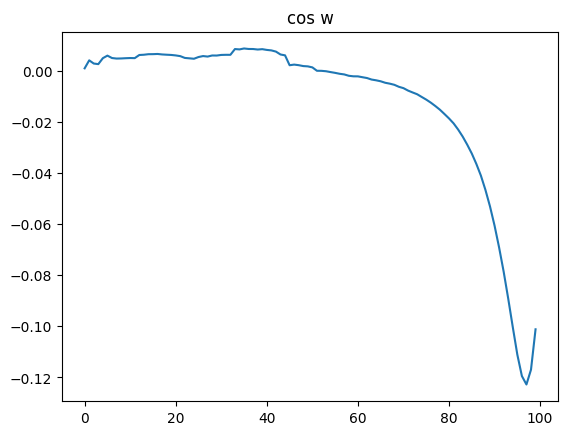

AxisError: axis 1 is out of bounds for array of dimension 1

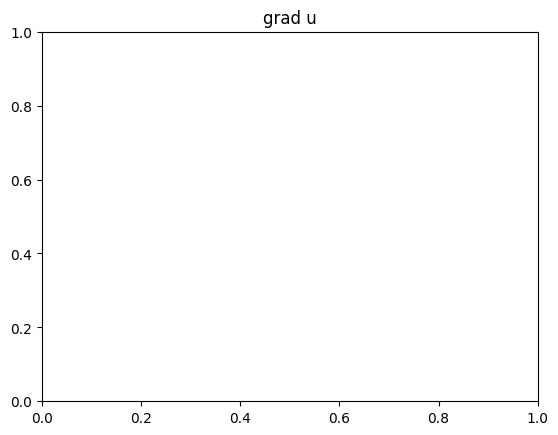

In [25]:
plt.plot(diffusion.summary['p'])
plt.show()
plt.title('norm u')
plt.plot(diffusion.summary['Norm u'])
plt.show()
plt.title('norm w')
plt.plot(diffusion.summary['Norm w'])
plt.show()
plt.title('cos u')
plt.plot(diffusion.summary['Cos u'])
plt.show()
plt.title('cos w')
plt.plot(diffusion.summary['Cos w'])
plt.show()
plt.title('grad u')
plt.plot(np.linalg.norm(np.array(diffusion.summary['Grad u']), axis=1))
plt.show()
plt.title('grad w')
plt.plot(np.linalg.norm(np.array(diffusion.summary['Grad w']), axis=1))
plt.show()

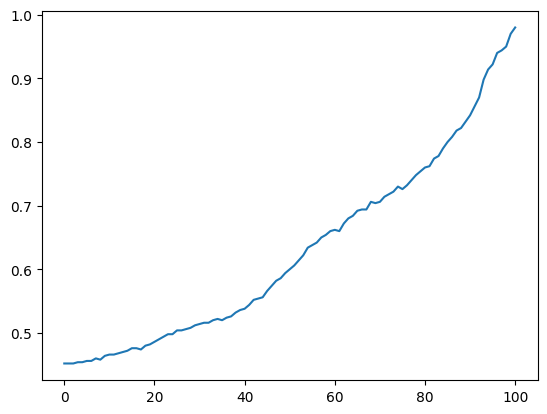

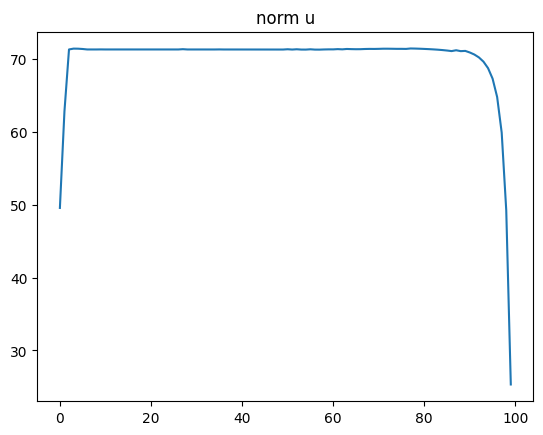

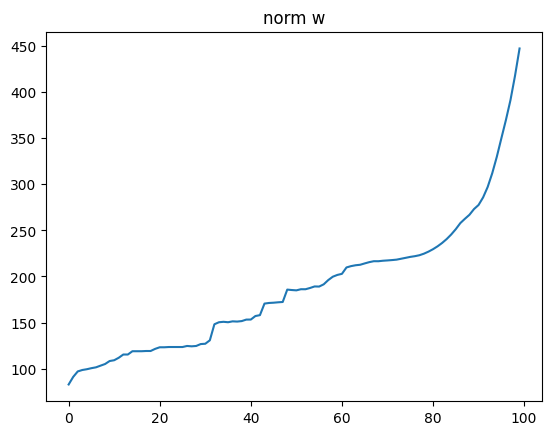

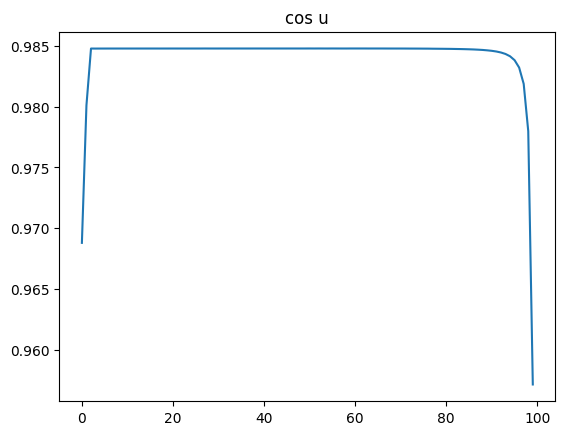

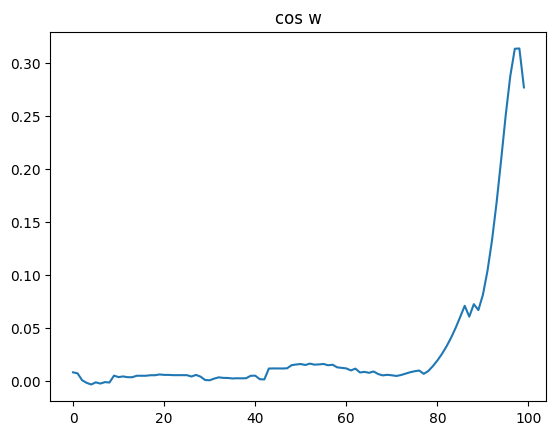

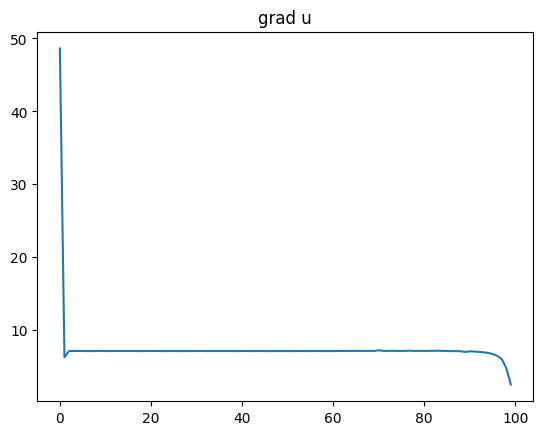

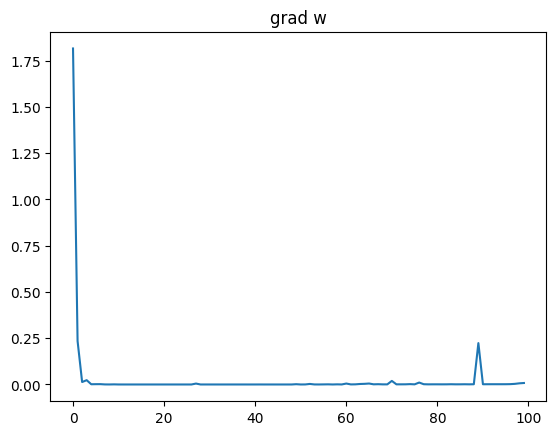

In [12]:
plt.plot(diffusion.summary['p'])
plt.show()
plt.title('norm u')
plt.plot(diffusion.summary['Norm u'])
plt.show()
plt.title('norm w')
plt.plot(diffusion.summary['Norm w'])
plt.show()
plt.title('cos u')
plt.plot(diffusion.summary['Cos u'])
plt.show()
plt.title('cos w')
plt.plot(diffusion.summary['Cos w'])
plt.show()
plt.title('grad u')
plt.plot(np.linalg.norm(np.array(diffusion.summary['Grad u']), axis=1))
plt.show()
plt.title('grad w')
plt.plot(np.linalg.norm(np.array(diffusion.summary['Grad w']), axis=1))
plt.show()

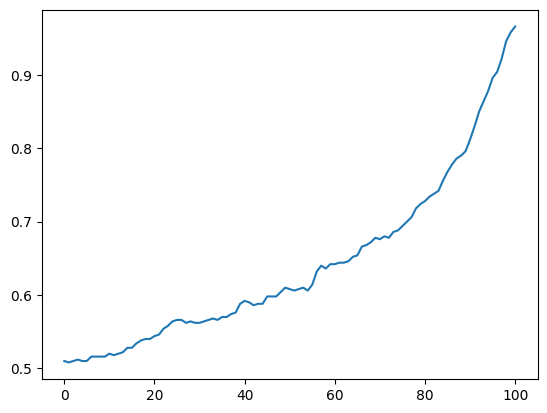

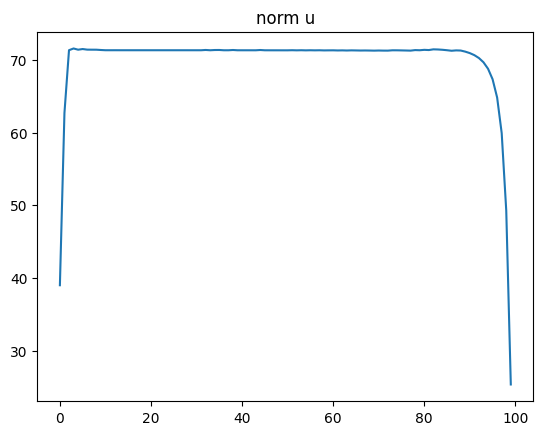

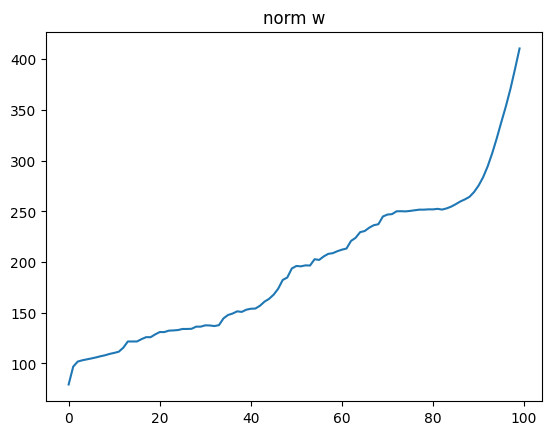

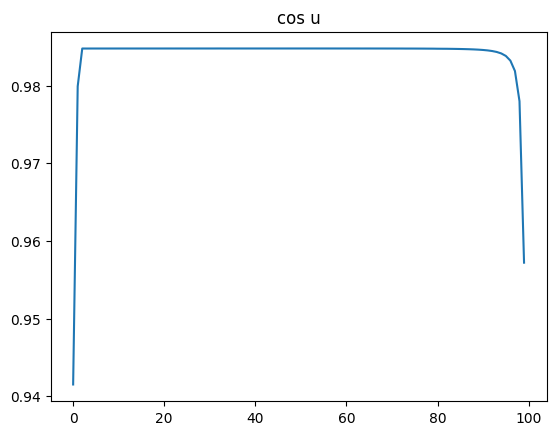

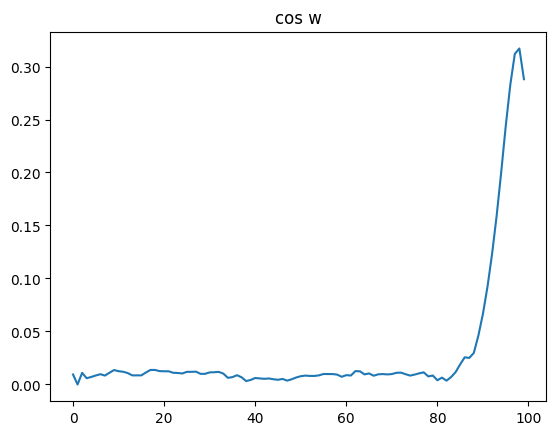

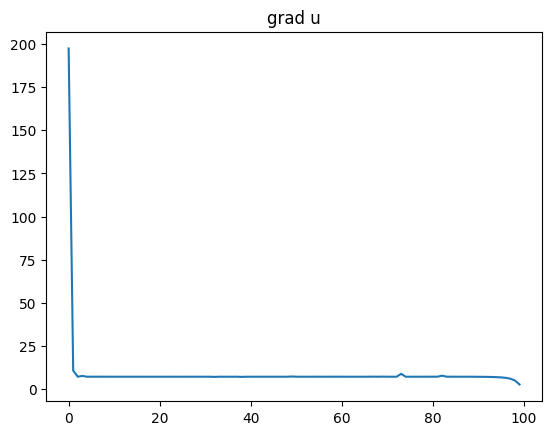

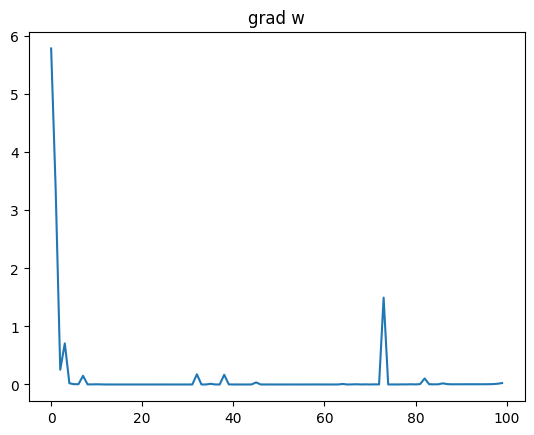

In [5]:
plt.plot(diffusion.summary['p'])
plt.show()
plt.title('norm u')
plt.plot(diffusion.summary['Norm u'])
plt.show()
plt.title('norm w')
plt.plot(diffusion.summary['Norm w'])
plt.show()
plt.title('cos u')
plt.plot(diffusion.summary['Cos u'])
plt.show()
plt.title('cos w')
plt.plot(diffusion.summary['Cos w'])
plt.show()
plt.title('grad u')
plt.plot(np.linalg.norm(np.array(diffusion.summary['Grad u']), axis=1))
plt.show()
plt.title('grad w')
plt.plot(np.linalg.norm(np.array(diffusion.summary['Grad w']), axis=1))
plt.show()

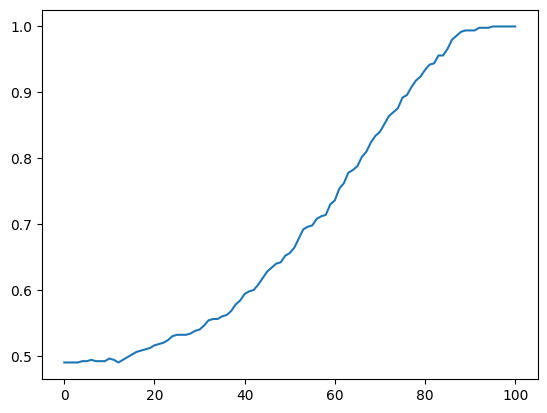

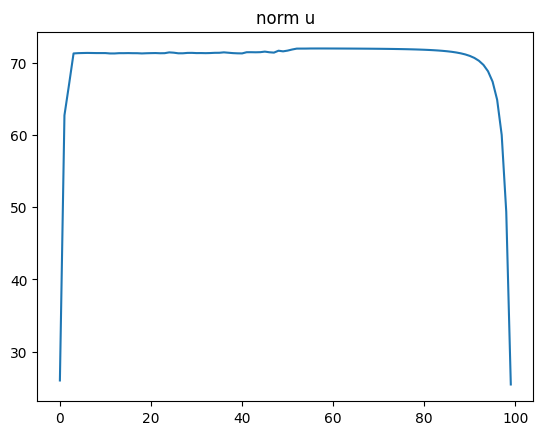

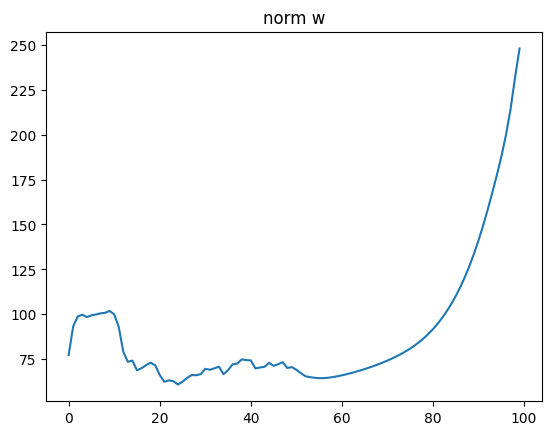

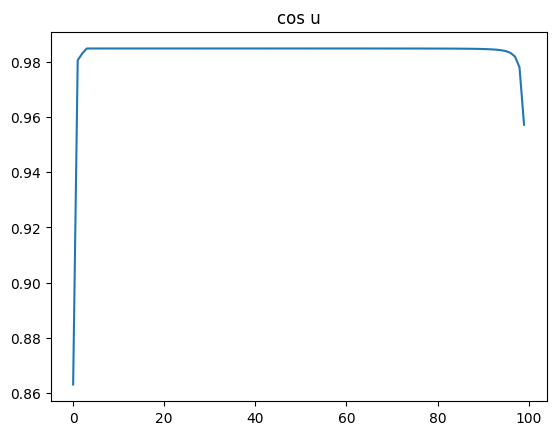

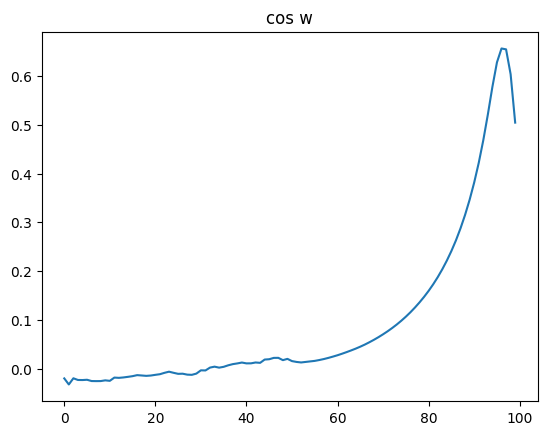

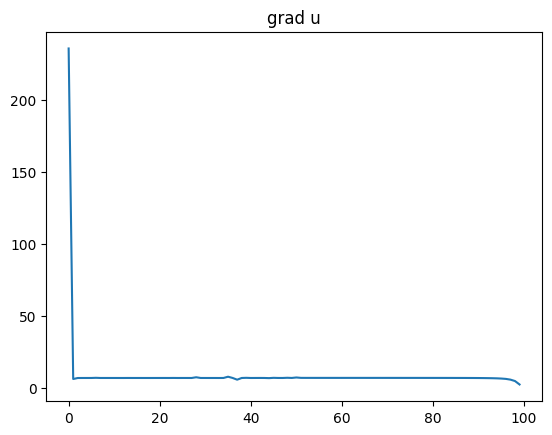

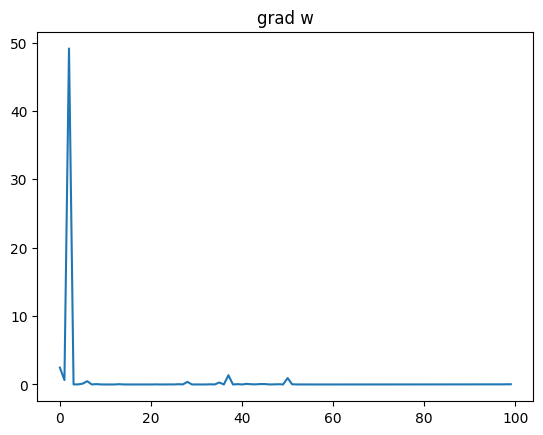

In [37]:
plt.plot(diffusion.summary['p'])
plt.show()
plt.title('norm u')
plt.plot(diffusion.summary['Norm u'])
plt.show()
plt.title('norm w')
plt.plot(diffusion.summary['Norm w'])
plt.show()
plt.title('cos u')
plt.plot(diffusion.summary['Cos u'])
plt.show()
plt.title('cos w')
plt.plot(diffusion.summary['Cos w'])
plt.show()
plt.title('grad u')
plt.plot(np.linalg.norm(np.array(diffusion.summary['Grad u']), axis=1))
plt.show()
plt.title('grad w')
plt.plot(np.linalg.norm(np.array(diffusion.summary['Grad w']), axis=1))
plt.show()

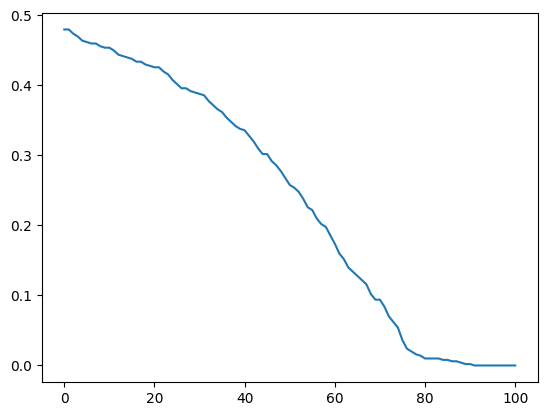

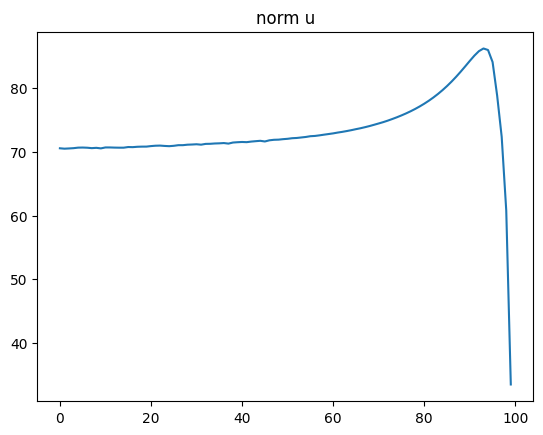

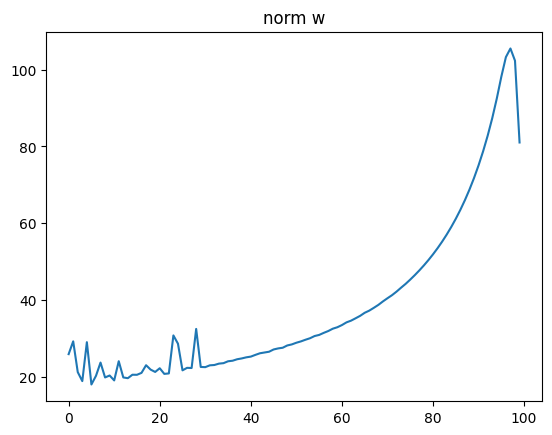

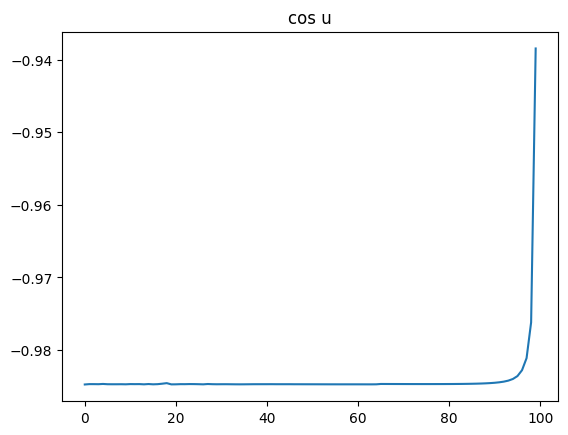

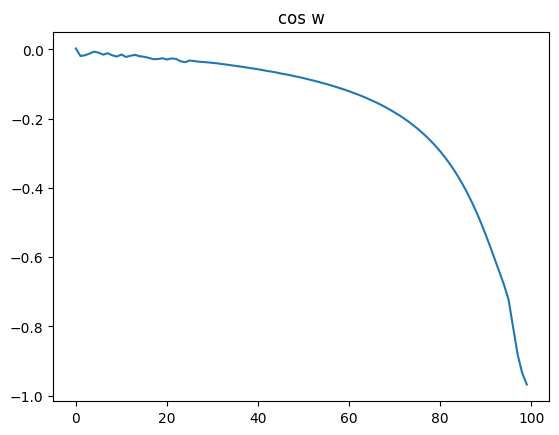

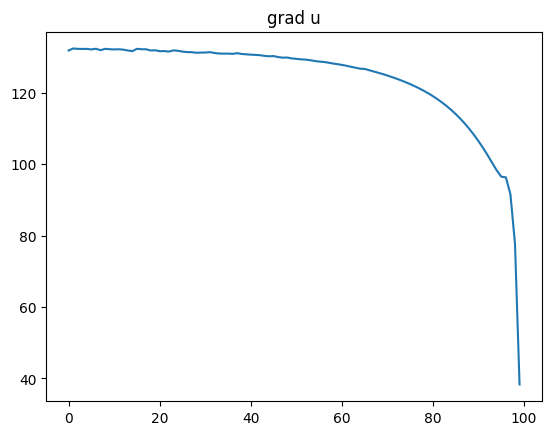

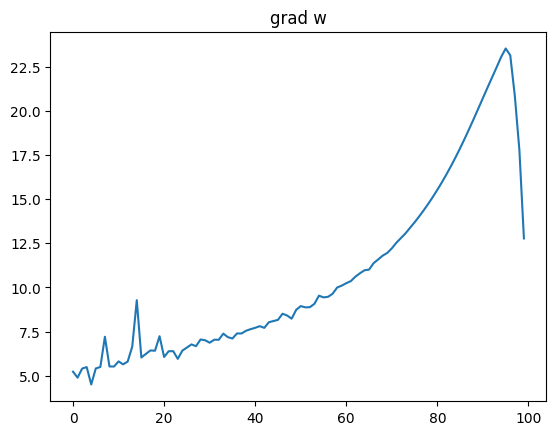

In [15]:
plt.plot(diffusion.summary['p'])
plt.show()
plt.title('norm u')
plt.plot(diffusion.summary['Norm u'])
plt.show()
plt.title('norm w')
plt.plot(diffusion.summary['Norm w'])
plt.show()
plt.title('cos u')
plt.plot(diffusion.summary['Cos u'])
plt.show()
plt.title('cos w')
plt.plot(diffusion.summary['Cos w'])
plt.show()
plt.title('grad u')
plt.plot(np.linalg.norm(np.array(diffusion.summary['Grad u']), axis=1))
plt.show()
plt.title('grad w')
plt.plot(np.linalg.norm(np.array(diffusion.summary['Grad w']), axis=1))
plt.show()

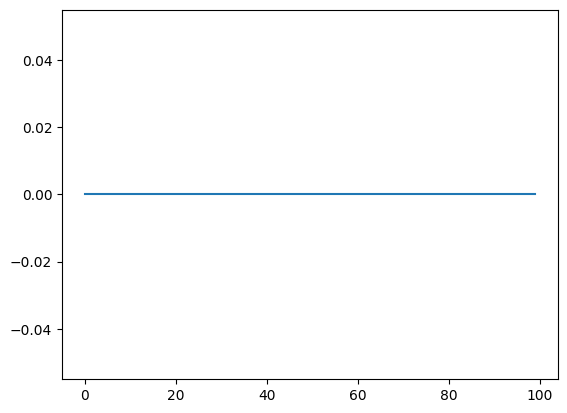

In [29]:
plt.plot(diffusion.summary['b'])

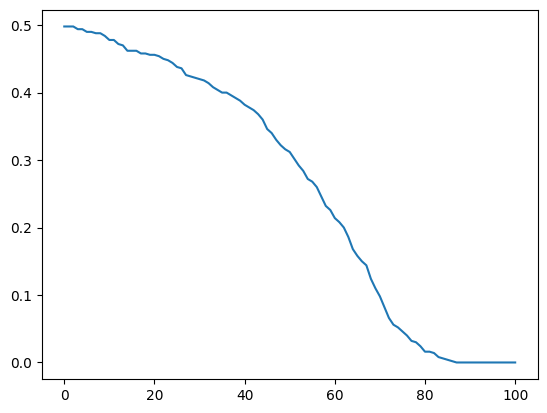

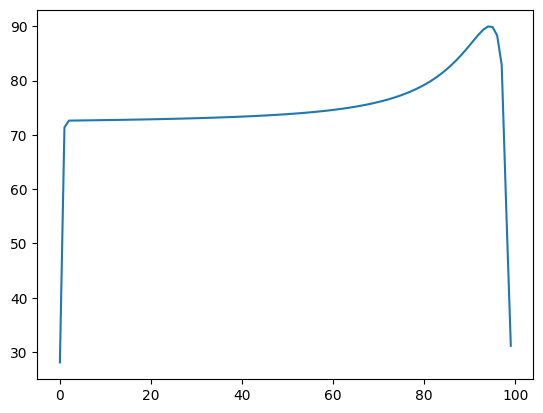

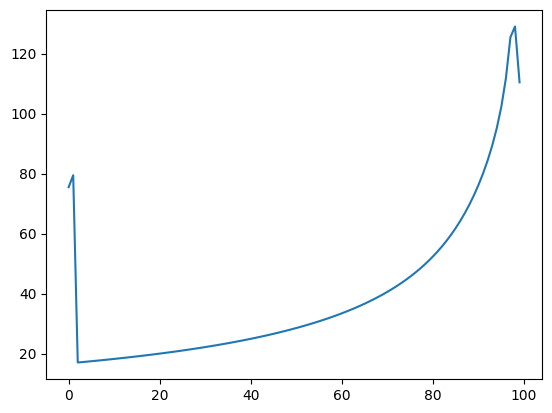

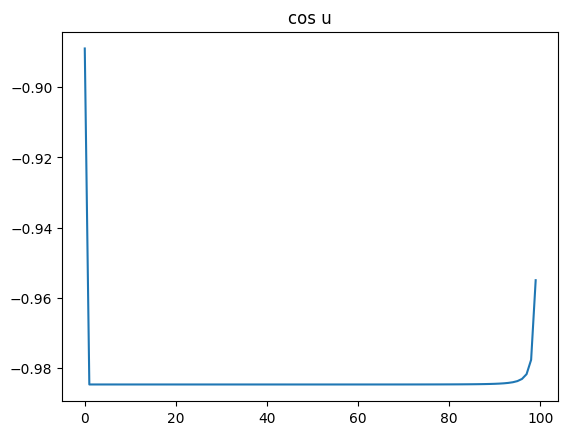

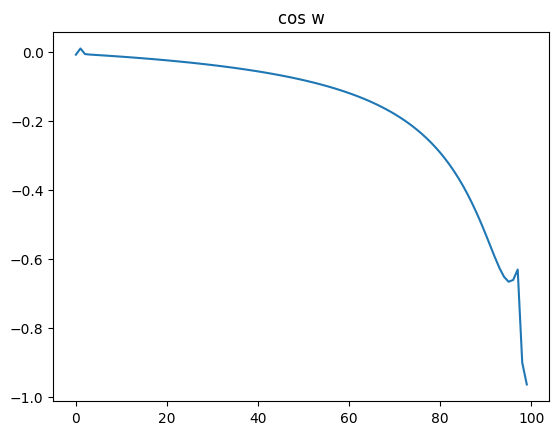

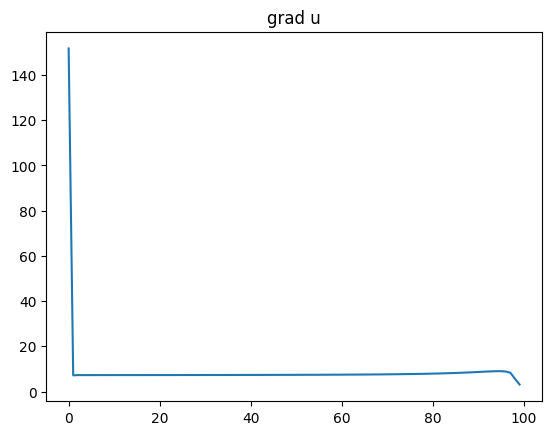

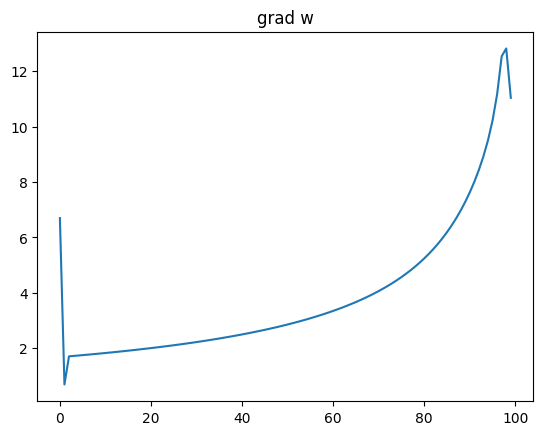

In [10]:
plt.plot(diffusion.summary['p'])
plt.show()
plt.title('norm u')
plt.plot(diffusion.summary['Norm u'])
plt.show()
plt.title('norm w')
plt.plot(diffusion.summary['Norm w'])
plt.show()
plt.title('cos u')
plt.plot(diffusion.summary['Cos u'])
plt.show()
plt.title('cos w')
plt.plot(diffusion.summary['Cos w'])
plt.show()
plt.title('grad u')
plt.plot(np.linalg.norm(np.array(diffusion.summary['Grad u']), axis=1))
plt.show()
plt.title('grad w')
plt.plot(np.linalg.norm(np.array(diffusion.summary['Grad w']), axis=1))
plt.show()

In [21]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

b = lambda x, t: (-x + np.tanh(4 * h + t * x / (1 - t)**2)) / (1 - t)

h = .693
x = np.random.randn(10000)
xs = [x]
ps = [np.mean(x>0)]
N = 1000
dt = 1/N

for i in range(N):
    x = x + b(x, i/N) * dt
    ps.append(np.mean(x > 0))
    xs.append(x)

xs = np.array(xs)
ps = np.array(ps)

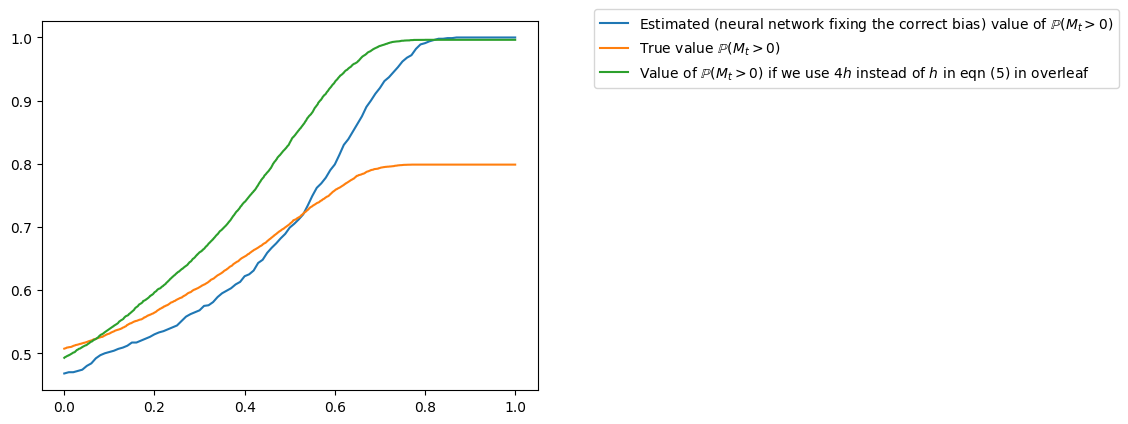

In [23]:
plt.plot(np.linspace(0, 1, 101), diffusion.summary['p'], label='Estimated (neural network fixing the correct bias) value of $\mathbb{P}(M_t > 0)$')
#plt.plot(np.linspace(0, 1, 1001), (ps2-.5)/.3/2+.5, label='True value $\mathbb{P}(M_t > 0)$, stretched to go from .5 to 1')
plt.plot(np.linspace(0, 1, 1001), ps2, label='True value $\mathbb{P}(M_t > 0)$')
plt.plot(np.linspace(0, 1, 1001), ps, label='Value of $\mathbb{P}(M_t > 0)$ if we use $4h$ instead of $h$ in eqn (5) in overleaf')
plt.legend(bbox_to_anchor=(1.1, 1.05))

In [51]:
np.linalg.norm(np.array(diffusion.summary['Grad u']), axis=1)

array([345.66315  ,  14.088025 ,  10.2884865,  10.283053 ,  10.289771 ,
        10.290322 ,  10.281667 ,  10.282038 ,  10.274596 ,  10.294235 ,
        10.28648  ,  10.299968 ,  10.294991 ,  10.288447 ,  10.297194 ,
        10.319704 ,  10.291469 ,  10.299164 ,  10.360136 ,  10.295275 ,
        10.3014965,  10.301087 ,  10.335586 ,  10.2965975,  10.305371 ,
        10.306355 ,  10.307445 ,  10.308533 ,  10.309649 ,  10.3108225,
        10.312022 ,  10.313282 ,  10.314553 ,  10.315885 ,  10.31728  ,
        10.318702 ,  10.320204 ,  10.321724 ,  10.3233595,  10.325043 ,
        10.326765 ,  10.328576 ,  10.330451 ,  10.332439 ,  10.334462 ,
        10.336591 ,  10.3388   ,  10.34112  ,  10.343535 ,  10.346086 ,
        10.348739 ,  10.351498 ,  10.354418 ,  10.357478 ,  10.36068  ,
        10.364085 ,  10.367647 ,  10.3713875,  10.375366 ,  10.379582 ,
        10.384016 ,  10.388729 ,  10.393751 ,  10.399063 ,  10.4047365,
        10.410764 ,  10.417232 ,  10.42415  ,  10.431593 ,  10.4

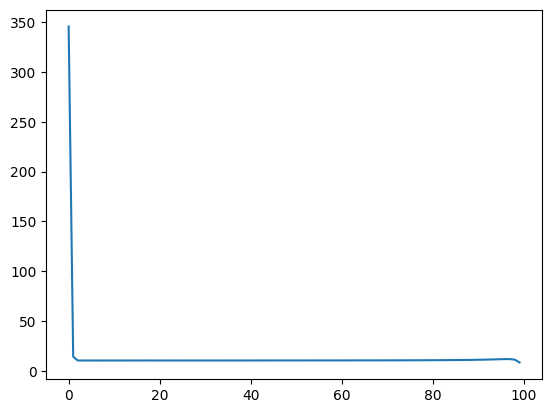

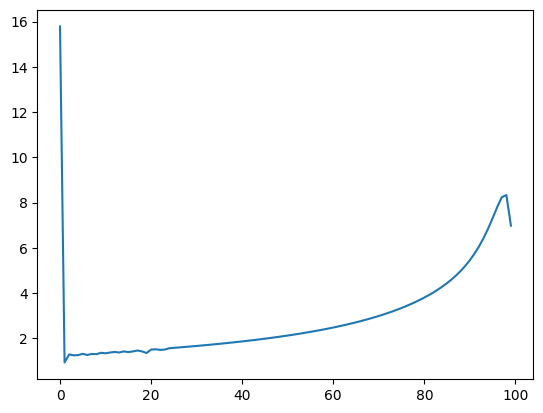

In [52]:
plt.plot(np.linalg.norm(np.array(diffusion.summary['Grad u']), axis=1))
plt.show()
plt.plot(np.linalg.norm(np.array(diffusion.summary['Grad w']), axis=1))
plt.show()

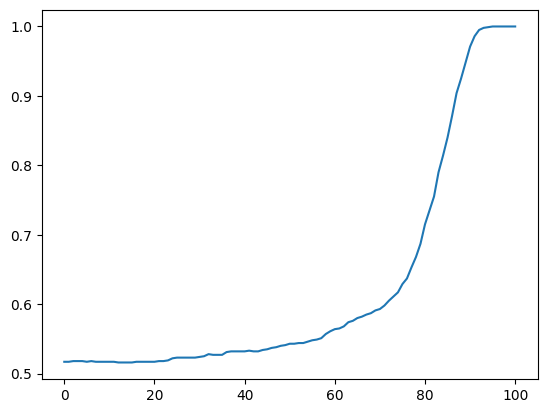

In [53]:
plt.plot(diffusion.summary['p'])

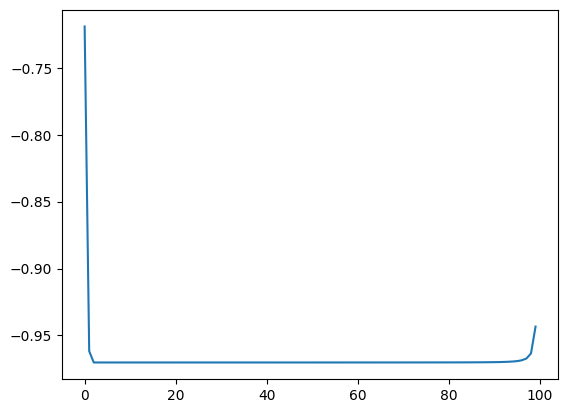

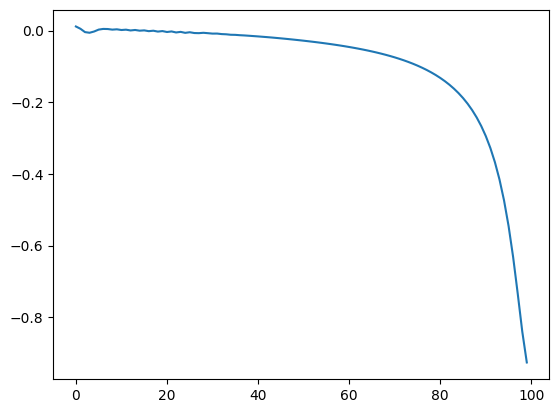

In [39]:
plt.plot(diffusion.summary['Cos u'])
plt.show()
plt.plot(diffusion.summary['Cos w'])
plt.show()

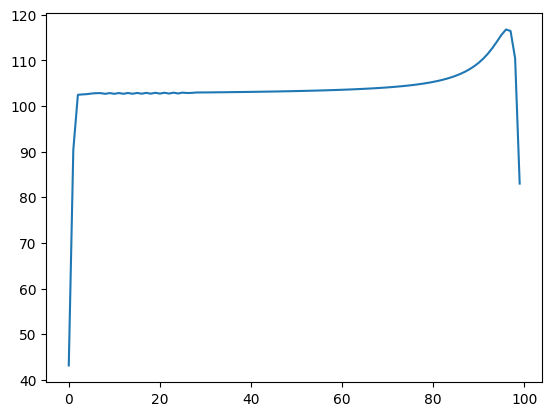

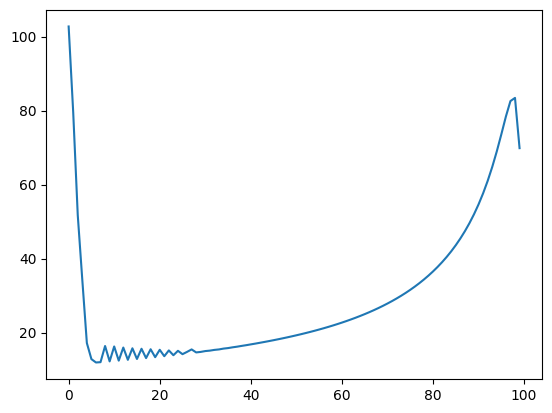

In [40]:
plt.plot(diffusion.summary['Norm u'])
plt.show()
plt.plot(diffusion.summary['Norm w'])
plt.show()

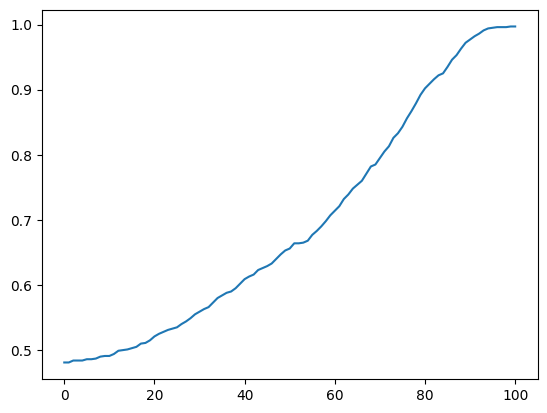

In [27]:
plt.plot(diffusion.summary['p'])

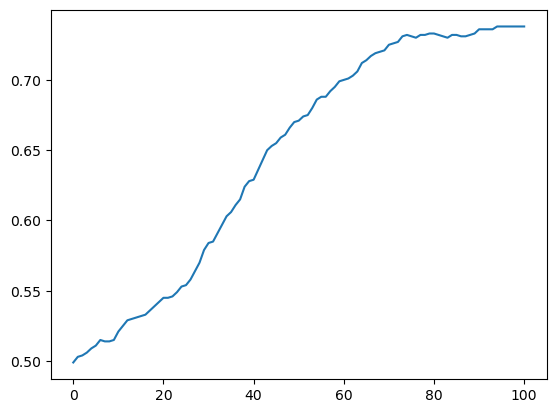

In [69]:
plt.plot(diffusion.summary['p'])

In [70]:
plt.plot(diffusion.summary['p']))

SyntaxError: unmatched ')' (68104639.py, line 1)

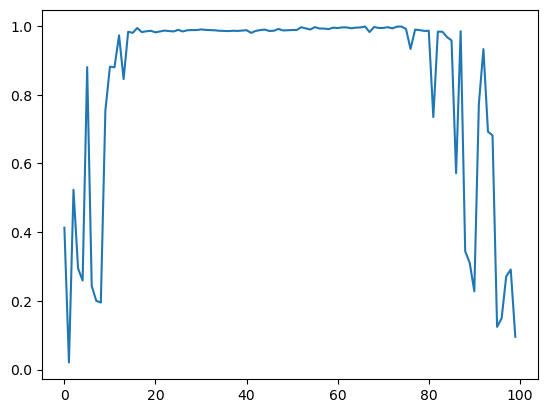

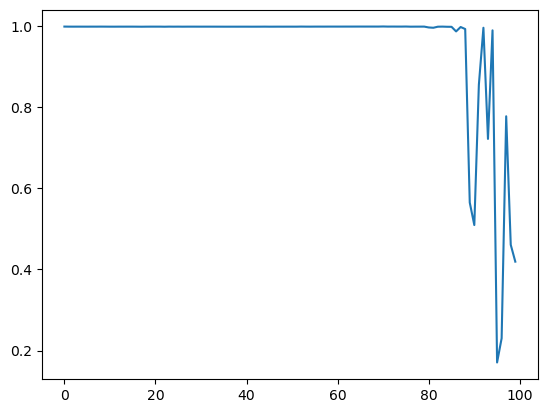

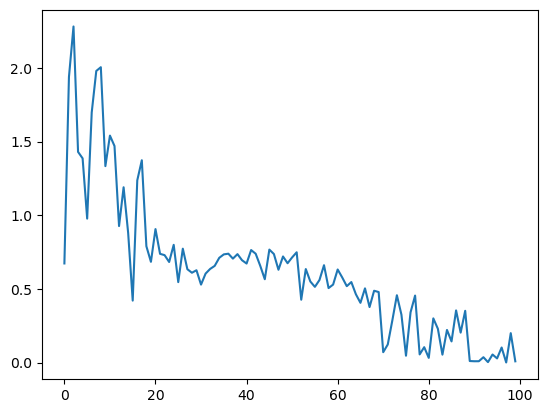

In [76]:
plt.plot(np.abs(diffusion.summary['Cos w']))
plt.show()
plt.plot(np.abs(diffusion.summary['Cos u']))
plt.show()
plt.plot(np.abs(diffusion.summary['b']))
plt.show()

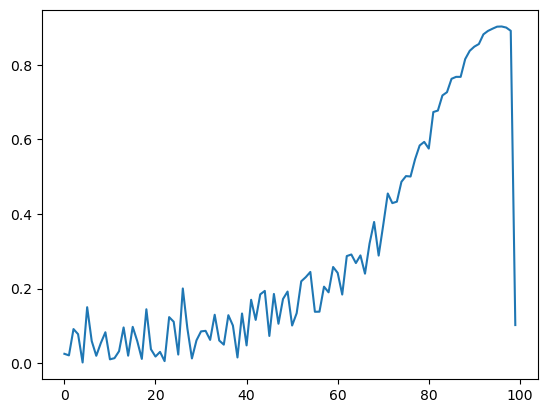

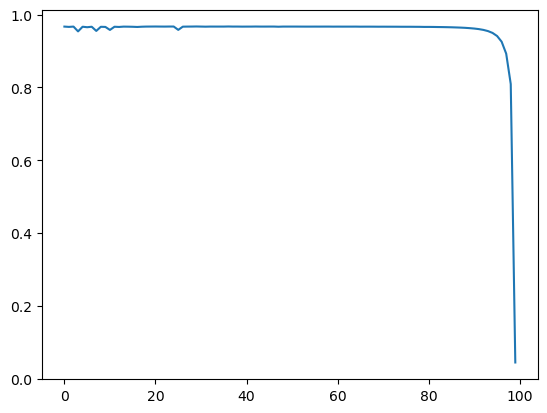

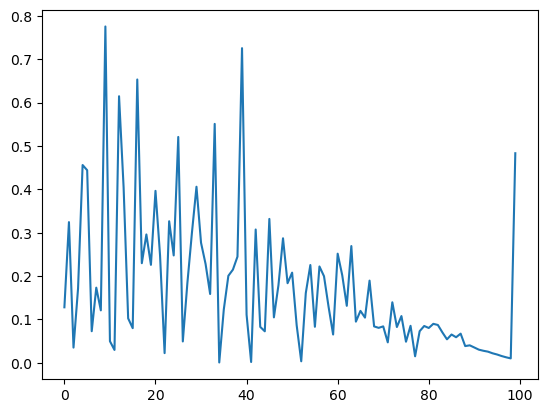

In [61]:
plt.plot(np.abs(diffusion.summary['Cos w']))
plt.show()
plt.plot(np.abs(diffusion.summary['Cos u']))
plt.show()
plt.plot(np.abs(diffusion.summary['b']))
plt.show()

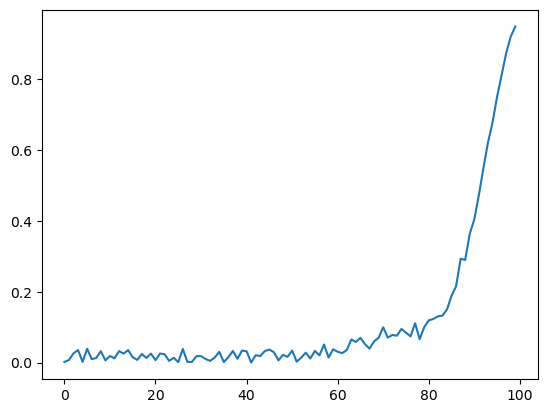

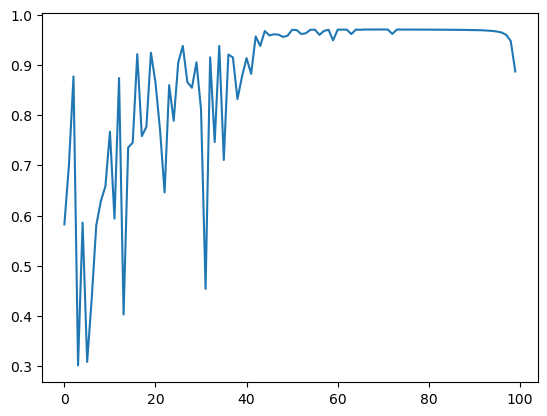

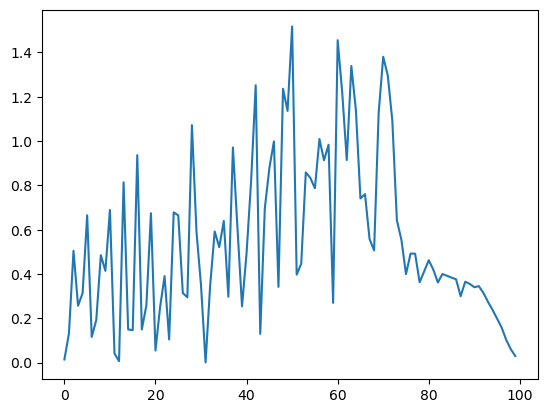

In [44]:
plt.plot(np.abs(diffusion.summary['Cos w']))
plt.show()
plt.plot(np.abs(diffusion.summary['Cos u']))
plt.show()
plt.plot(np.abs(diffusion.summary['b']))
plt.show()

In [43]:
a = diffusion.summary['Grad w']

In [30]:
torch.ones((16, 1)) @ torch.ones((1, 15))

tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1.,

In [64]:
np.linalg.norm(diffusion.summary['Grad w'], axis=1)

array([  7.670802 ,   7.0867147,   9.513759 ,   3.1420012,   4.129785 ,
        15.12499  ,   6.107143 ,  21.992428 ,   9.857539 ,   6.421381 ,
         5.9375167,  13.886418 ,  12.349285 , 255.2813   ,   7.2501025,
        16.063375 ,   4.0546565,   5.3473334,  20.577408 ,   6.327383 ,
        13.805419 ,   6.0643797,   6.5541   ,   8.401003 ,   5.9449916,
         5.47742  ,  10.950911 ,   7.9081874,   7.2206326,   6.638791 ,
         4.9211173,   4.4508104,   4.734126 ,   3.818701 ,   3.497666 ,
         3.700642 ,   5.4377923,   3.8778622,  23.193874 ,   4.29219  ,
         4.613188 ,   6.0250115,  23.380693 ,   7.342582 ,  18.405426 ,
         4.016666 ,   5.5796995,  16.293425 ,   3.9018147,   2.2072966,
         1.8907651, 301.84067  ,   1.9950572,   1.9243268,  59.159775 ,
        32.682526 ,   1.980237 ,   2.4628146,   2.0260348,   1.5858041,
         4.166808 ,   4.807958 ,   1.9125221,   5.1454234,  11.671141 ,
         3.5406346,   2.277274 ,   2.7218466,   2.8137066,   3.5

In [ ]:
torch.tile(torch.tensor([1,2,3]), 

In [65]:
np.linalg.norm(diffusion.summary['Grad u'], axis=1)

array([169.7364   , 194.88268  , 191.02562  , 183.78514  , 185.37733  ,
       184.37671  , 198.95193  , 182.72502  , 179.9583   , 180.26761  ,
       171.00485  , 208.25256  , 170.95576  , 162.73558  , 162.2848   ,
       171.7634   , 211.9291   , 136.62013  , 134.72758  , 142.757    ,
       137.61761  , 141.77808  , 193.43321  , 153.62839  , 144.61984  ,
       109.56779  , 148.79439  , 188.0439   , 121.91094  , 108.22172  ,
       131.35767  , 117.13093  ,  84.93525  , 155.4186   , 166.60522  ,
       134.97847  ,  91.38578  ,  76.9448   , 107.95918  , 119.16417  ,
        69.025246 , 188.43039  ,  70.93371  , 234.97572  , 100.93534  ,
        64.21216  ,  89.163246 ,  77.933495 , 111.06611  ,  59.07097  ,
        54.859234 ,  43.204884 ,  71.84265  ,  39.024834 ,  34.253963 ,
       212.50002  ,  28.791405 ,  20.57104  ,  21.067621 ,  30.279856 ,
        20.59015  ,  18.305885 ,  28.857685 ,  14.538089 ,  67.238716 ,
         8.311687 ,  10.764071 ,  27.444492 ,   8.55051  ,   7.5

In [31]:
diffusion.summary['p']

[0.489,
 0.491,
 0.493,
 0.494,
 0.494,
 0.497,
 0.498,
 0.498,
 0.502,
 0.505,
 0.505,
 0.505,
 0.506,
 0.509,
 0.511,
 0.514,
 0.515,
 0.517,
 0.517,
 0.52,
 0.526,
 0.53,
 0.533,
 0.535,
 0.545,
 0.548,
 0.55,
 0.546,
 0.549,
 0.553,
 0.553,
 0.554,
 0.559,
 0.559,
 0.556,
 0.564,
 0.568,
 0.574,
 0.583,
 0.586,
 0.585,
 0.588,
 0.592,
 0.591,
 0.599,
 0.594,
 0.596,
 0.597,
 0.595,
 0.595,
 0.599,
 0.604,
 0.607,
 0.604,
 0.608,
 0.604,
 0.609,
 0.61,
 0.62,
 0.624,
 0.623,
 0.636,
 0.644,
 0.654,
 0.674,
 0.662,
 0.662,
 0.677,
 0.681,
 0.678,
 0.685,
 0.707,
 0.712,
 0.723,
 0.74,
 0.75,
 0.754,
 0.771,
 0.772,
 0.776,
 0.804,
 0.836,
 0.835,
 0.828,
 0.84,
 0.818,
 0.857,
 0.835,
 0.838,
 0.809,
 0.76,
 0.709,
 0.704,
 0.737,
 0.788,
 0.814,
 0.841,
 0.817,
 0.813,
 0.743,
 0.73]

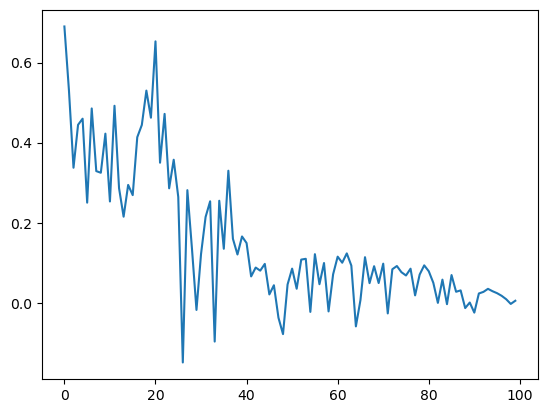

In [33]:
plt.plot(diffusion.summary['b'])

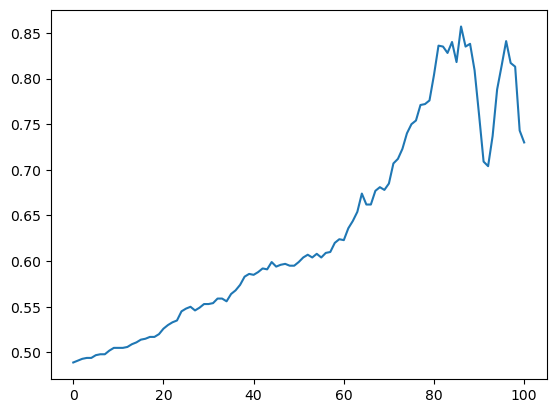

In [32]:
plt.plot(diffusion.summary['p'])

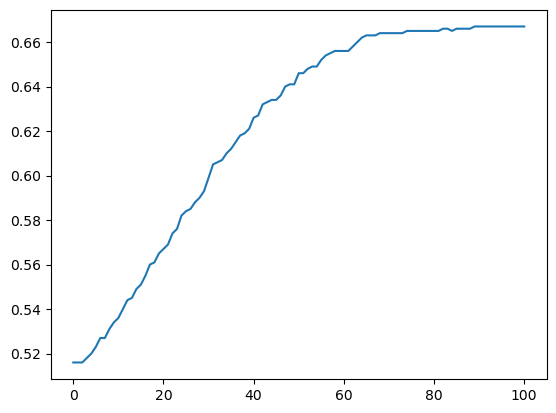

In [31]:
plt.plot(diffusion.summary['p'])

In [19]:
diffusion.summary['p']

[0.526,
 0.528,
 0.531,
 0.533,
 0.535,
 0.537,
 0.539,
 0.542,
 0.543,
 0.545,
 0.55,
 0.552,
 0.557,
 0.559,
 0.563,
 0.565,
 0.569,
 0.573,
 0.575,
 0.579,
 0.587,
 0.591,
 0.591,
 0.593,
 0.597,
 0.599,
 0.606,
 0.611,
 0.615,
 0.617,
 0.62,
 0.623,
 0.627,
 0.632,
 0.639,
 0.64,
 0.643,
 0.651,
 0.657,
 0.663,
 0.67,
 0.678,
 0.685,
 0.688,
 0.691,
 0.695,
 0.7,
 0.705,
 0.709,
 0.719,
 0.727,
 0.731,
 0.735,
 0.741,
 0.743,
 0.748,
 0.751,
 0.755,
 0.763,
 0.768,
 0.772,
 0.774,
 0.777,
 0.78,
 0.782,
 0.785,
 0.786,
 0.787,
 0.789,
 0.789,
 0.789,
 0.791,
 0.796,
 0.798,
 0.802,
 0.804,
 0.806,
 0.807,
 0.807,
 0.807,
 0.807,
 0.807,
 0.807,
 0.807,
 0.807,
 0.807,
 0.807,
 0.807,
 0.807,
 0.807,
 0.807,
 0.807,
 0.807,
 0.807,
 0.807,
 0.807,
 0.807,
 0.807,
 0.807,
 0.807,
 0.807]

In [24]:
d = diffusion

In [ ]:
plt.plot(np.array(diffusion.summary['M_t'])[:, :1000]);
#plt.xlim(70, 90)

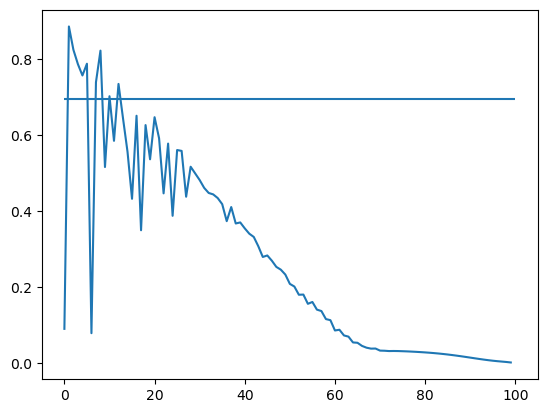

In [32]:
plt.plot(np.abs(diffusion.summary['b']))
plt.hlines(.693, 0, 100)

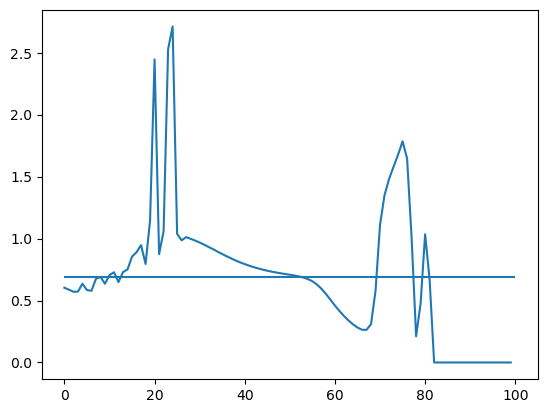

In [23]:
plt.plot(np.abs(diffusion.summary['b']))
plt.hlines(.693, 0, 100)

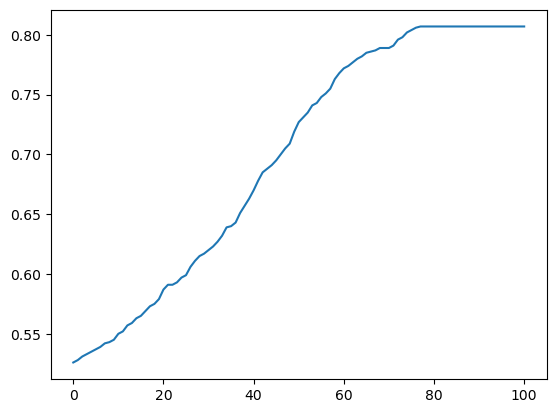

In [20]:
plt.plot(diffusion.summary['p'])

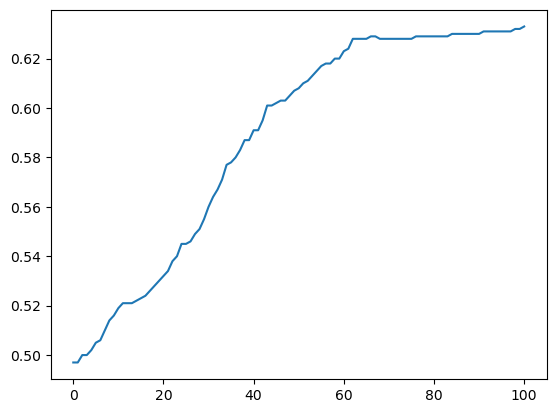

In [47]:
plt.plot(diffusion.summary['p'])

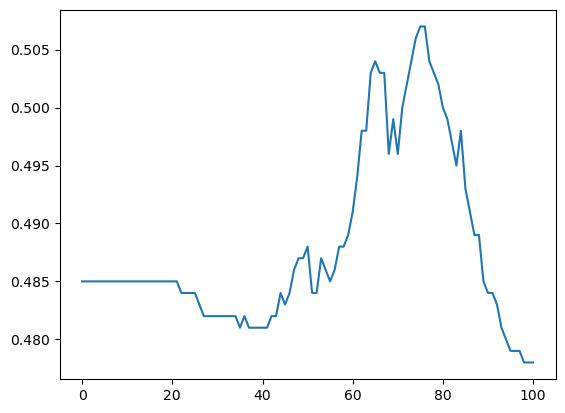

In [38]:
plt.plot(diffusion.summary['p'])

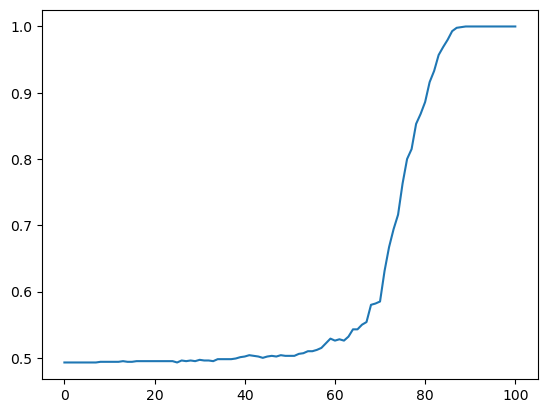

In [15]:
plt.plot(diffusion.summary['p'])

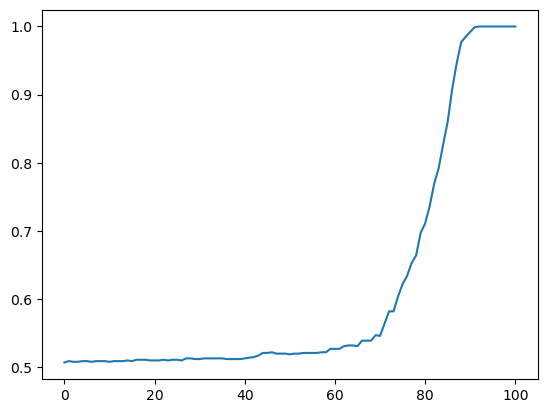

In [11]:
plt.plot(diffusion.summary['p'])

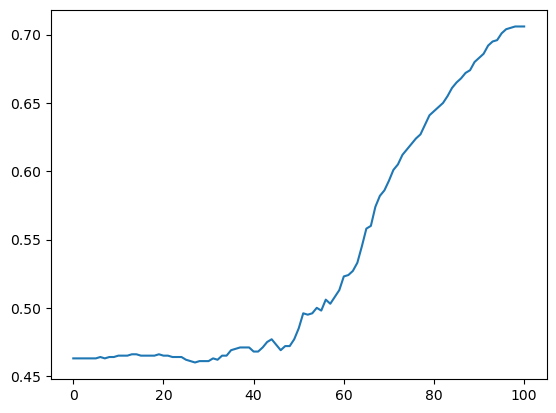

In [22]:
plt.plot(diffusion.summary['p'])

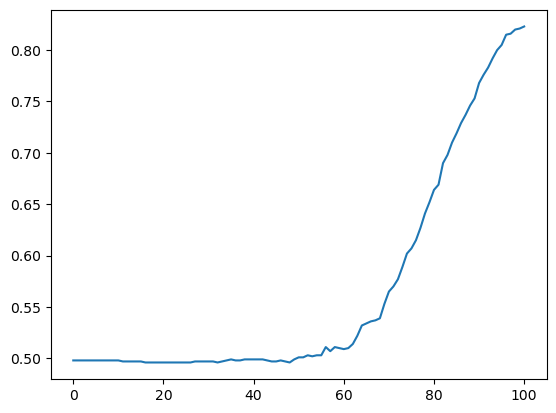

In [7]:
plt.plot(diffusion.summary['p'])

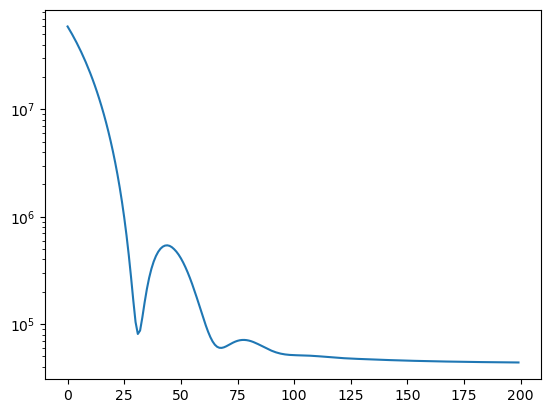

In [49]:
k = 10
plt.semilogy(diffusion.losses[k * epochs:(k+1) * epochs]);
#plt.plot()

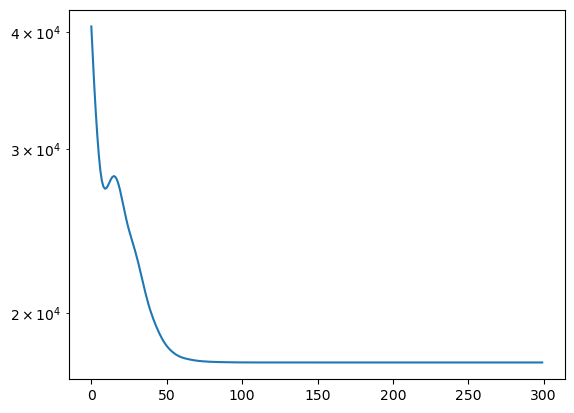

In [27]:
k = 99
plt.semilogy(diffusion.losses[k * epochs:(k+1) * epochs]);
#plt.plot()

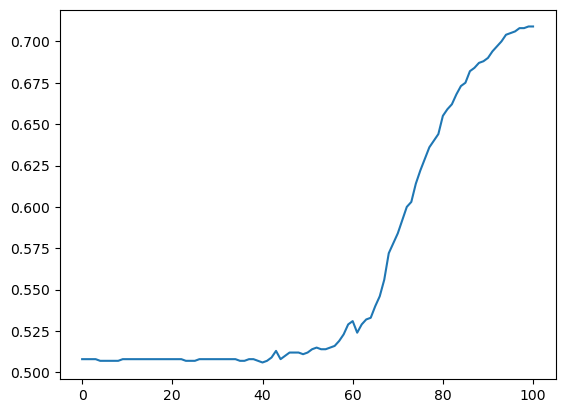

In [258]:
plt.plot(diffusion.summary['p'])

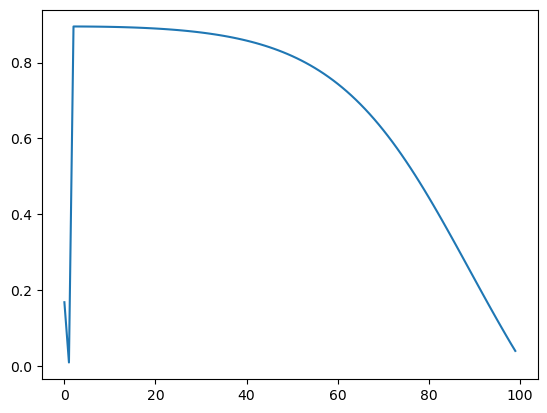

In [66]:
#aa = diffusion.summary
plt.plot(np.abs(diffusion.summary['Cos w']))

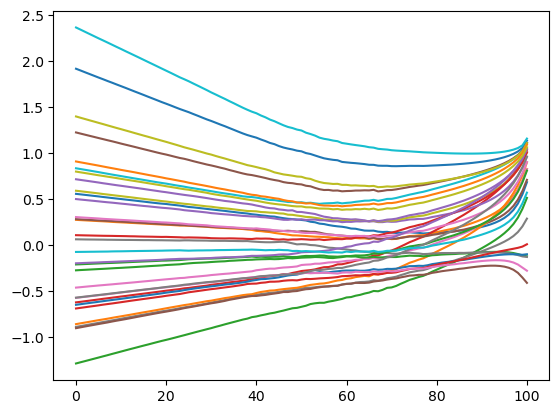

In [58]:
c = np.array(diffusion.summary['M_t'])
plt.plot(c[:, :30]);
#plt.xlim(0, 10)
#plt.ylim(-1000, 1000)

In [ ]:
plt.plot(np.abs(diffusion.summary['M_t']))

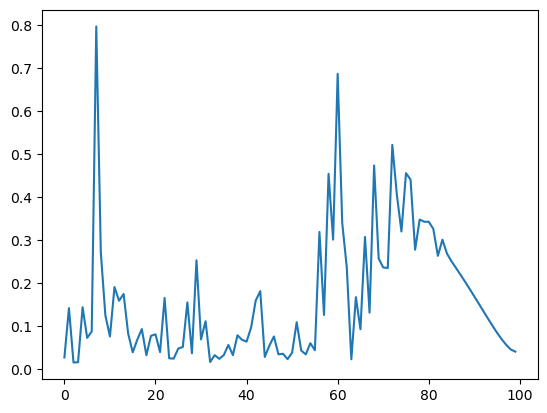

In [28]:
plt.plot(np.abs(diffusion.summary['b']))

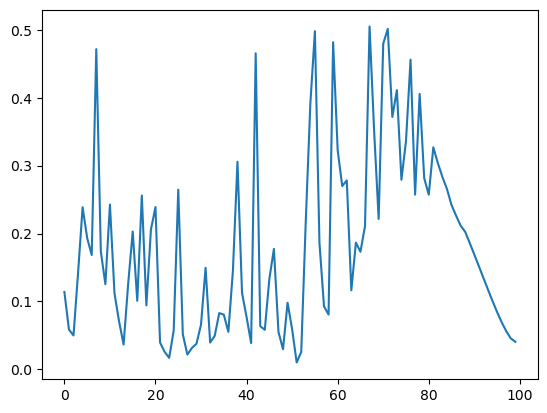

In [21]:
plt.plot(np.abs(diffusion.summary['b']))

In [152]:
h =.7
np.exp(h) / (np.exp(h) + np.exp(-h))

0.8021838885585818

Parameter containing:
tensor([0.0407], device='cuda:0', requires_grad=True)

In [176]:
np.squeeze(diffusion.summary['b'])

array([-0.24237856, -0.18517567, -0.08569282, -0.04752747, -0.07197905,
       -0.02127837,  0.13866986,  0.40545735,  0.13472305,  0.29752564,
        0.04609858,  0.03901266,  0.0216643 , -0.29642087, -0.17507198,
       -0.0230961 ,  0.07688341, -0.34528017,  0.08496984, -0.14356656,
        0.41727975, -0.4731516 ,  0.25538227,  0.3507327 , -0.24012567,
       -0.22038652, -0.21145304,  0.23723297,  0.12629214, -0.09266087,
       -0.3920231 ,  0.05276276,  0.17055084, -0.04583064, -0.12660573,
        0.25815588, -0.43304068, -0.23330696,  0.01883644, -0.24169149,
        0.33061123,  0.7058765 ,  0.32413706, -0.49449322, -0.26010242,
        0.26441136, -0.05052217,  0.09438808,  0.2629473 , -0.19198358,
       -0.22340357,  0.31609145,  0.2230807 , -0.43097386, -0.55342805,
       -0.5793349 ,  0.45244512, -0.13350907,  0.5794398 ,  0.2721771 ,
       -0.2930483 ,  0.05622589,  0.1143105 , -0.31892654,  0.1876652 ,
       -0.01951504,  0.14018495, -0.20586605,  0.37555087, -0.03

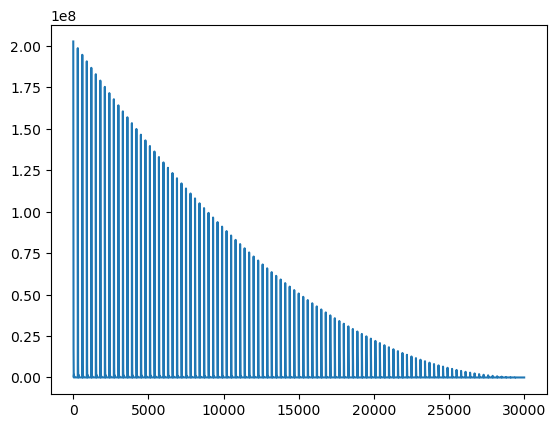

In [178]:
plt.plot(diffusion.losses)

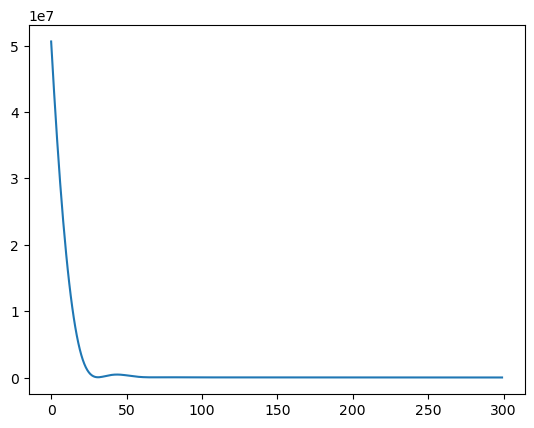

In [177]:
#k = 10
#plt.semilogy(diffusion.losses[k * epochs:(k+1) * epochs])
k = 5
plt.plot(diffusion.losses[k * epochs:(k+1) * epochs])
#plt.plot(diffusion.losses)

In [55]:
mu = np.ones(d)
np.mean(diffusion.X_gen @ mu > 0)

0.481

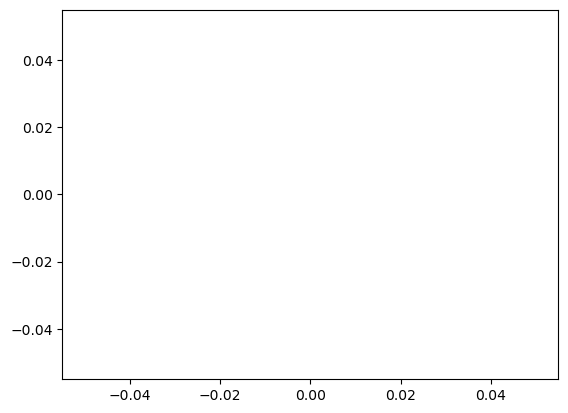

In [9]:
plt.plot(np.abs(diffusion.summary['Cos w']))
plt.show()

In [68]:
diffusion.X_gen @ mu

array([-10255.93066605, -10122.83572213, -10163.00633891, -10105.34532639,
       -10143.17758401,  10127.51506974,   9993.40886718, -10143.53556192,
        10241.52420495,   9991.30824356, -10087.90499913, -10133.25744899,
        10216.09850842, -10062.37002531,  10058.8140669 ,   9939.05903654,
        10035.83999498,  10024.86567217,  10075.30448466, -10098.16137013,
        10056.28300401, -10013.51279491, -10120.86676251, -10168.14923152,
        10090.4950184 ,   9985.61723268, -10060.81800018,  10055.26387651,
        10055.54160629,  10225.4321603 ,  10002.25523408,  10206.49270274,
       -10092.17202996,  10125.16261444,  10029.13143381,  10146.67692197,
        10042.04351625, -10120.84507667, -10116.54550407,  10054.68685022,
        10072.44947371, -10007.18284436, -10071.91903427,  10145.89087365,
       -10184.91194332,  10164.44441075, -10149.2347282 , -10081.68153683,
       -10241.63088394, -10091.64052593,  10085.68249915,  10100.30789333,
       -10116.68044911, -

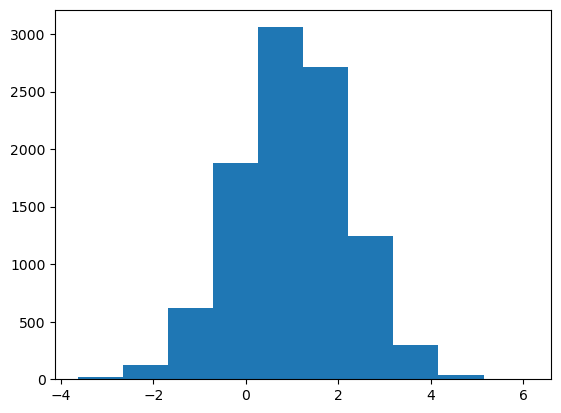

In [69]:
plt.hist(diffusion.X_gen[5])
plt.show()

In [ ]:
X_gen.shape

(1000, 100)